<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Waze_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Explanation

The dataset utilized for the purpose of this analysis is a Waze Dataset.

Waze is a GPS navigation app that offers up-to-date details on traffic conditions, travel times, accidents, road hazards, and more. They have approximately 140 million active users in the US.

Since the COVID-19 pandemic, more people have used Waze for errand runs and travel due to its efficiency and real-time updates.

Waze is now more connected with popular apps like Spotify, allowing drivers to enjoy navigation alongside entertainment.

This dataset focuses on building a model which can accurate predict Waze users that will retain or churn based on user driving behavior.

# Starter Code

- ID: A sequential numbered index.
- label: Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month.
- sessions: The number of occurrence of a user opening the app during the month.
- drives: An occurrence of driving at least 1 km during the month.
- total_sessions: A model estimate of the total number of sessions since a user has onboarded.
- n_days_after_onboarding: The number of days since a user signed up for the app.
- total_navigations_fav1: Total navigations since onboarding to the user’s favorite place 1.
- total_navigations_fav2 Total navigations since onboarding to the user’s favorite place 2.
- driven_km_drives: Total kilometers driven during the month.
- duration_minutes_drives: Total duration driven in minutes during the month.
- activity_days: Number of days the user opens the app during the month.
- driving_days: Number of days the user drives (at least 1 km) during the month.
- device: The type of device a user starts a session with.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [ ]:
# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/waze_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(5)

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

This starter code allows us to access the dataset and to see how it looks like.

# Data Exploration

## Shape

In [ ]:
data.shape

(14999, 13)

This shows us that the dataset has 14999 rows and 13 columns.

## Missing Values

In [ ]:
data.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

We are dropping all missing values from 'Label' which is our target, since it is less than 5% of our dataset.

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [ ]:
data = data.drop('ID', axis = 1)

We also dropped 'ID' since it is a form of identification and will not provide relevent insights.

## Types

In [ ]:
data.dtypes

label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

In [ ]:
data['label'] = data['label'].astype('category')
data['total_sessions'] = data['total_sessions'].astype(float)
data['device'] = data['device'].astype('category')

In [ ]:
data.dtypes

label                      category
sessions                      int64
drives                        int64
total_sessions              float64
n_days_after_onboarding       int64
total_navigations_fav1        int64
total_navigations_fav2        int64
driven_km_drives            float64
duration_minutes_drives     float64
activity_days                 int64
driving_days                  int64
device                     category
dtype: object

Here we fixed the values: 'label', 'total_sessions' and 'device' so that they are their correct types, since they should be categories ('label' and 'device') and floats ('total_sessions')

# Univariate Analysis

## Describe

In [ ]:
data.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      80.623820     67.255822      189.547409              1751.822505   
std       80.736502     65.947295      136.189764              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               121.747395               29.638296       4044.401535   
std                147.713428               45.350890       2504.977970   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  
count             14299.000000   14299.000000  14299.000000  
mean               1864.199794      15.544653     12.182530  
std                1448.005047       9.016088      7.833835  
min                  18.282082       0.000000      0.000000  
25%                 840.181344       8.000000      5.000000  
50%                1479.394387      16.000000     12.000000  
75%                2466.928876      23.000000     19.000000  
max               15851.727160      31.000000     30.000000

This shows the numeric data of the dataset, with things such as mean, std, min, etc. Which will help us in our analysis.

## Histogram and Count Plots

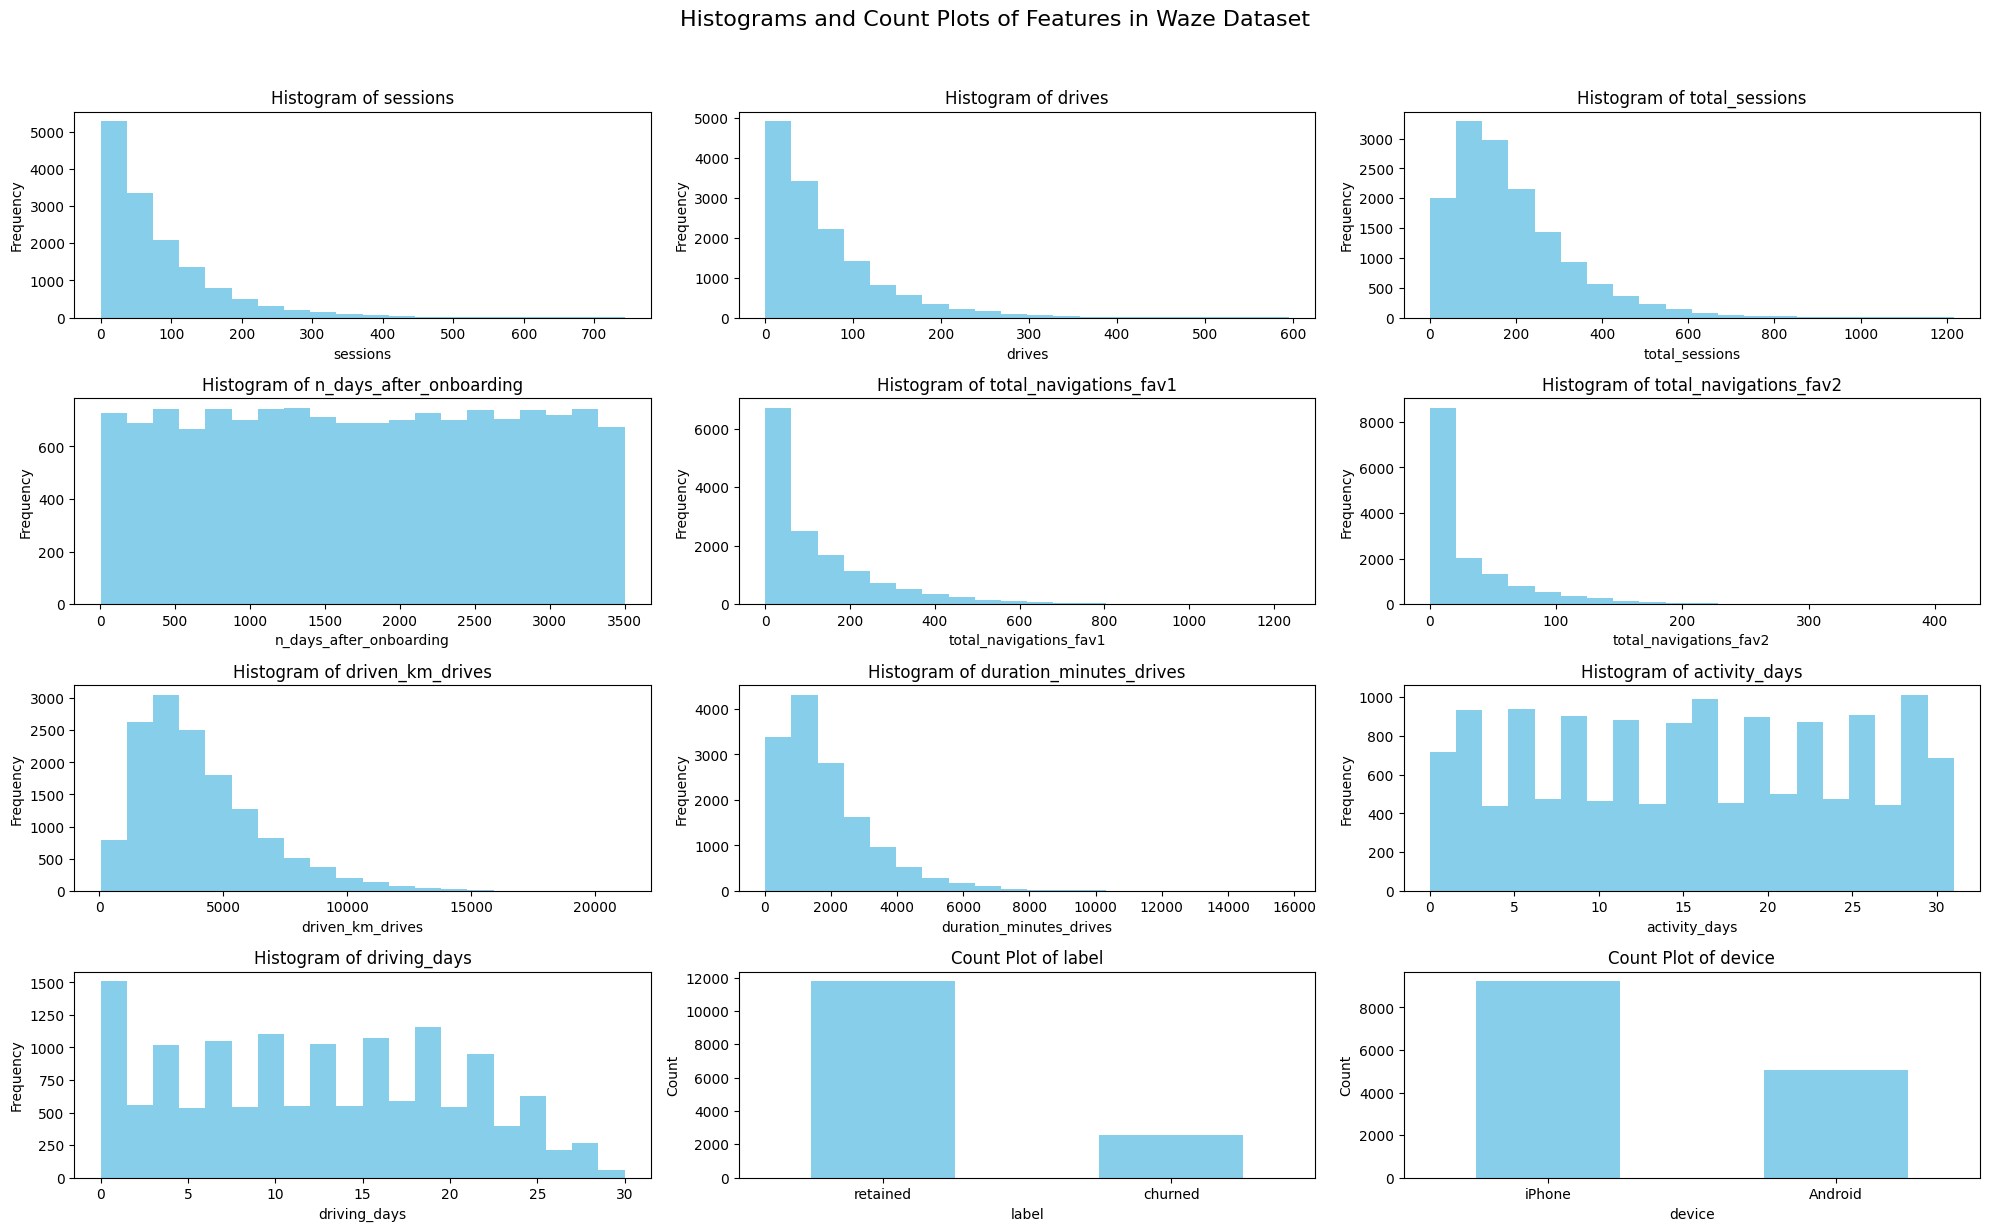

In [ ]:
# Select numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['category', 'object']).columns  # Include object for string categorical data

# Set figure size for the plots
plt.figure(figsize=(20, 15))

# Counter for subplot index
plot_number = 1

# Total number of subplots
total_plots = len(numeric_columns) + len(categorical_columns)

# Plot histograms for numeric columns
for column in numeric_columns:
    plt.subplot((total_plots // 3) + 1, 3, plot_number)
    plt.hist(data[column].dropna(), color='skyblue', bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plot_number += 1

# Plot count plots for categorical columns
for column in categorical_columns:
    plt.subplot((total_plots // 3) + 1, 3, plot_number)
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.xticks(rotation=0)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column}')
    plot_number += 1

# Overall title for the entire figure
plt.suptitle('Histograms and Count Plots of Features in Waze Dataset', fontsize=16)

# Adjust layout and show the plots
plt.xticks(rotation=0)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Right-skewed distributions (sessions, drives, total_sessions, total_navigations_fav1, total_navigations_fav2, driven_km_drives, duration_minutes_drives): These histograms indicate that most users interact with the platform or use features a small amount, with a few outliers showing much higher engagement. These outliers could be power users or particularly loyal customers.

* Uniform distributions (n_days_after_onboarding, activity_days): These suggest no strong trends in the specific variable, indicating an even spread of user activity across days.

* Bimodal distribution (driven_km_drives): This one shows two distinct groups of users in terms of their driving behavior.

* The Count Plots of Count Plot of label & Count Plot of Device are both bimodal histograms: This means there are two categories being compared:(retained and churned) & (iPhone and Android), both showing that with significantly more users retained than churned and with more users using iPhones than Android devices.

## Value Counts

In [ ]:
# Frequency table for 'device'
device_counts = data['device'].value_counts()
print(device_counts)

device
iPhone     9225
Android    5074
Name: count, dtype: int64


In [ ]:
# Frequency table for 'device'
label_counts = data['label'].value_counts()
print(label_counts)

label
retained    11763
churned      2536
Name: count, dtype: int64


This data shows how there are more iPhone users than Android users, and how a majority of users are retained rather than churned.

## Boxplots

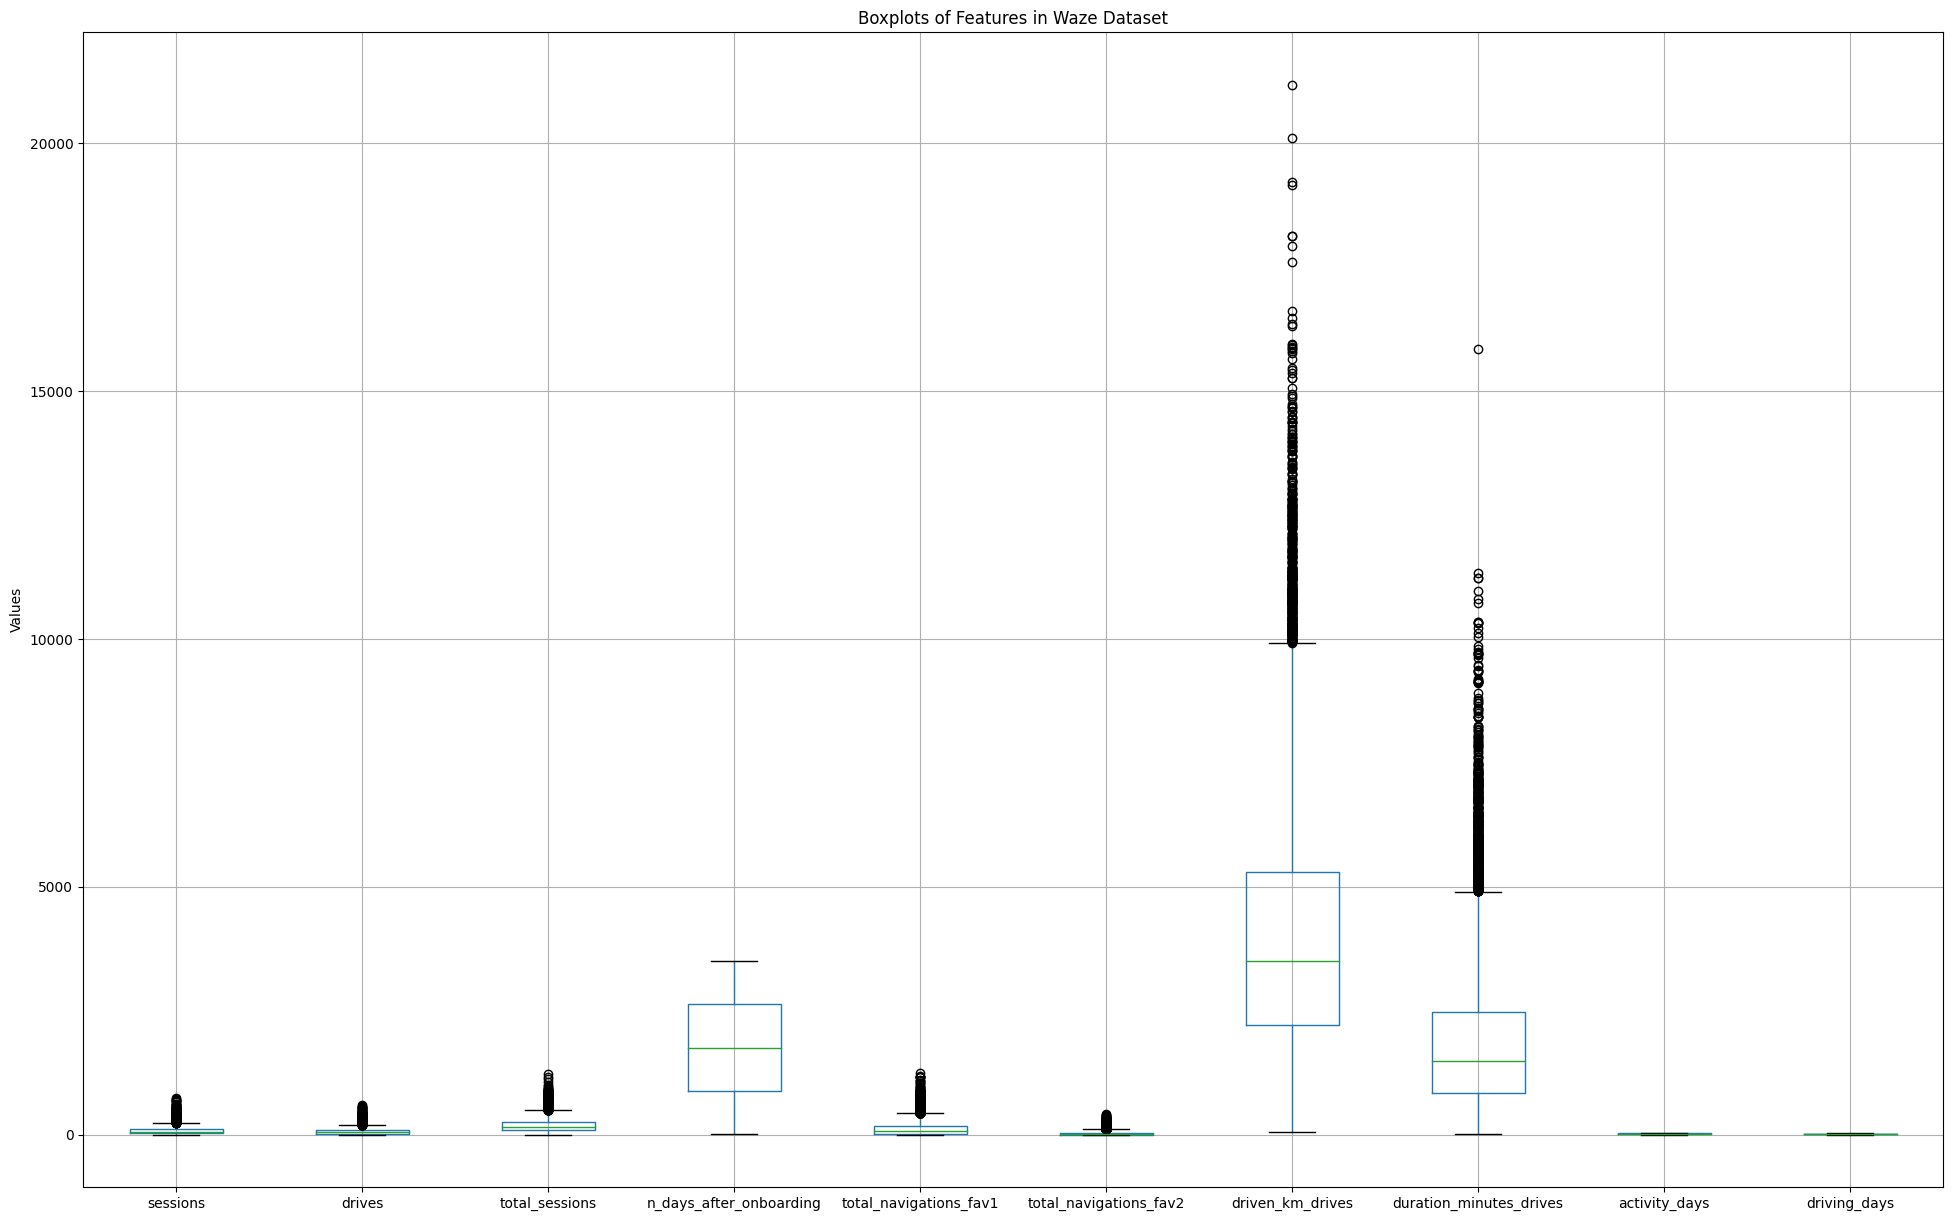

In [ ]:
data.boxplot(figsize = (24,15))
plt.ylabel('Values')
plt.title('Boxplots of Features in Waze Dataset')
plt.show()

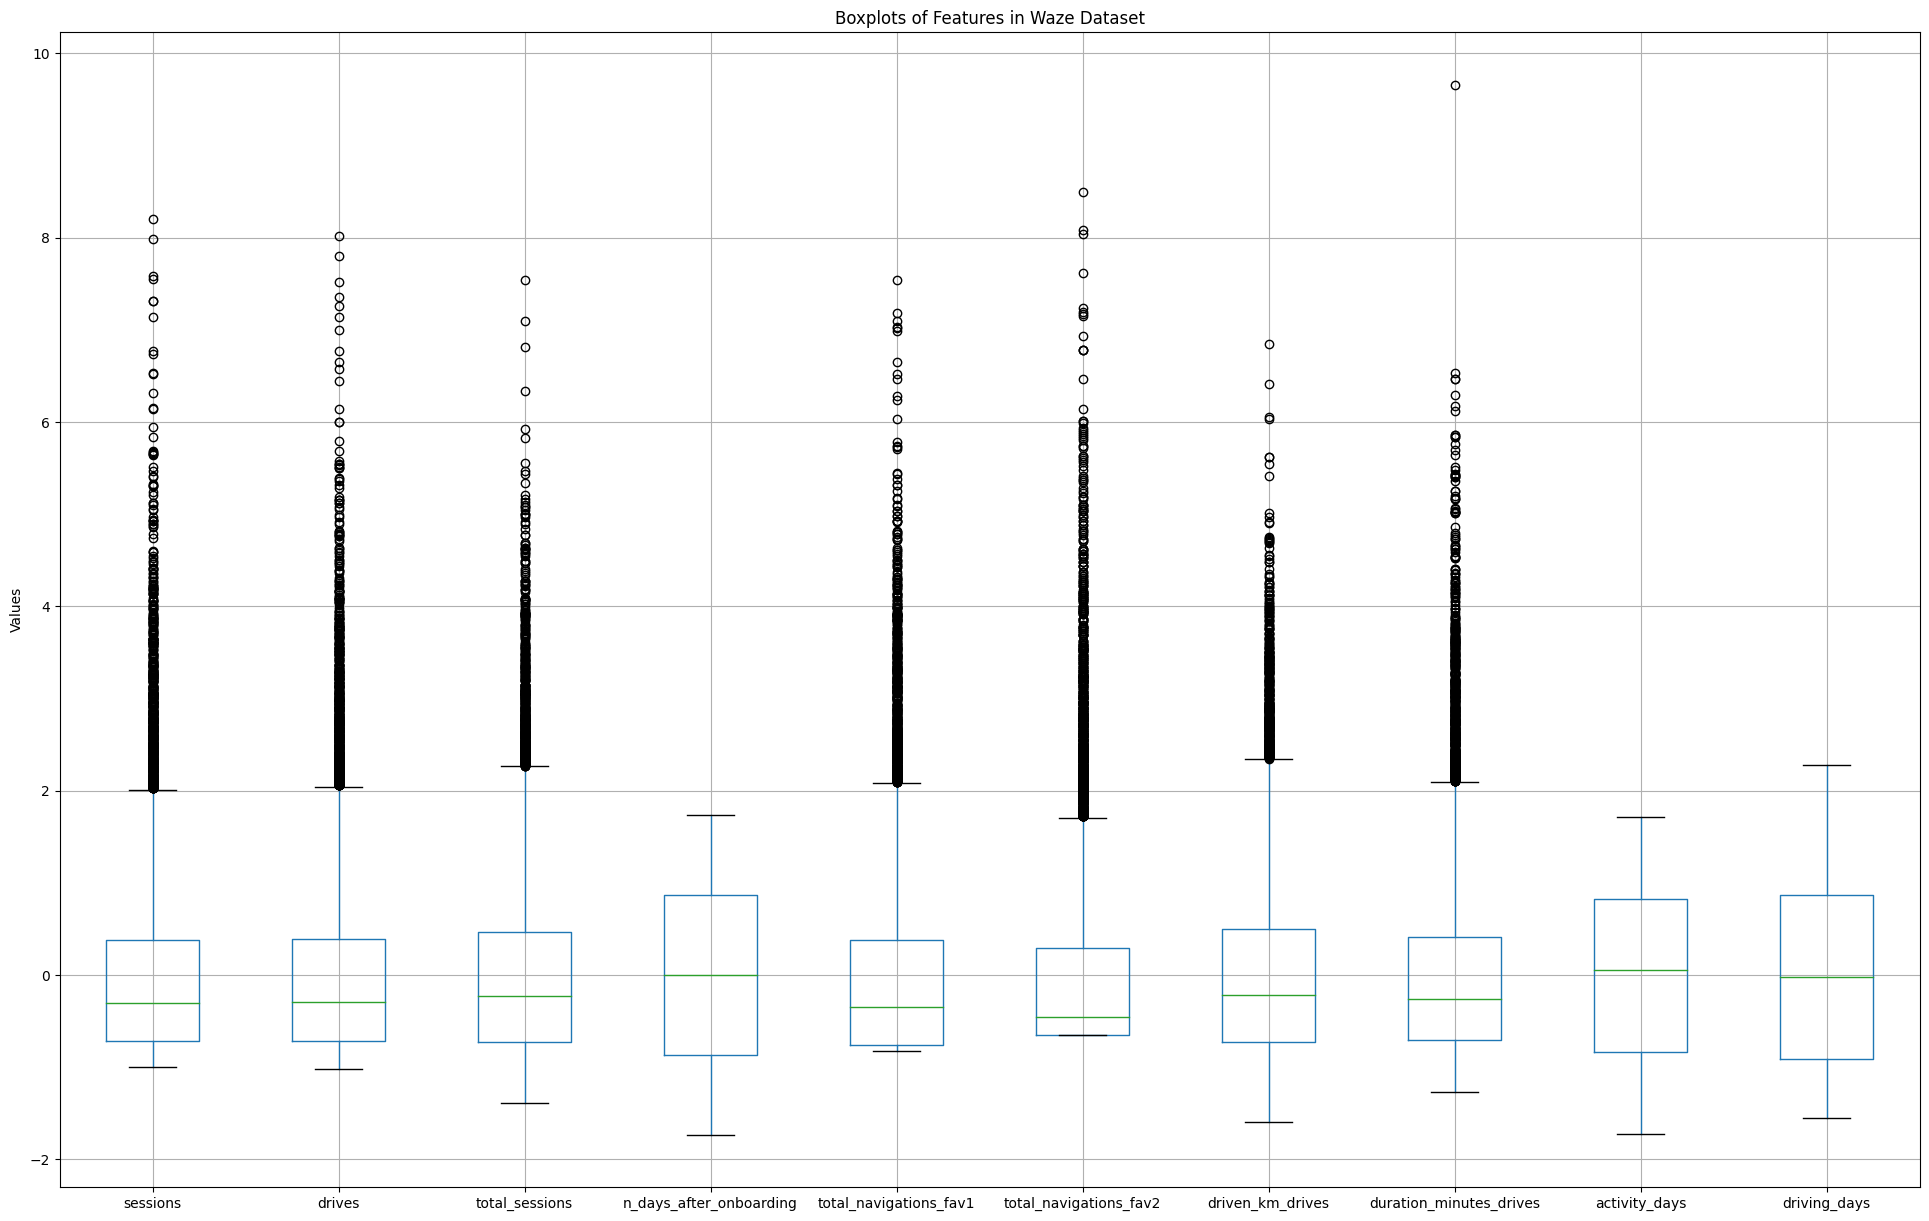

In [ ]:
data2 = data.copy()

# Select only numerical columns from the dataframe
numerical_cols = data2.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data2[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Plotting the new boxplots
data2.boxplot(figsize = (24,15))
plt.ylabel('Values')
plt.title('Boxplots of Features in Waze Dataset')
plt.show()

In the second graph, the data has been scaled, which is why the values are smaller and more evenly distributed compared to the first graph.

The boxplots show that after scaling, most features have their values concentrated around the mean, and the range of outliers is reduced but still present for certain variables like driven_km_drives and duration_minutes_drives. This indicates that, while scaling has brought the data to a more uniform range, there are still features with significant variability, especially those related to driving behavior.

## Pie Chart for Label

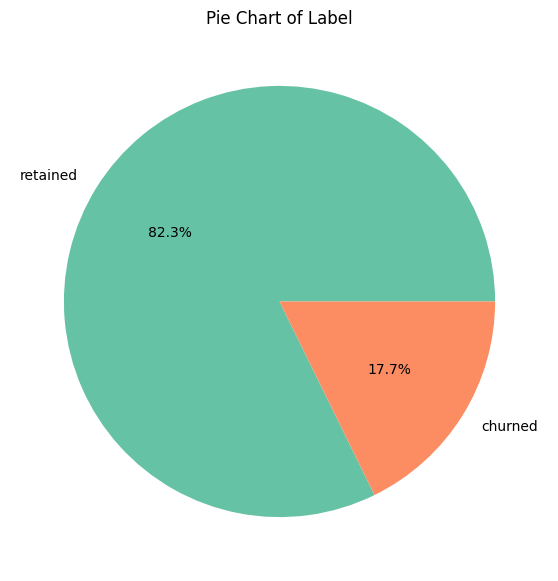

In [ ]:
# Pie chart for 'label'
data['label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7), colors=sns.color_palette('Set2'))
plt.title('Pie Chart of Label')
plt.ylabel('')
plt.show()

In this pie chart we see how a majority of the users are retained rather than churned.

# Bivariate Analysis

## Pairplot

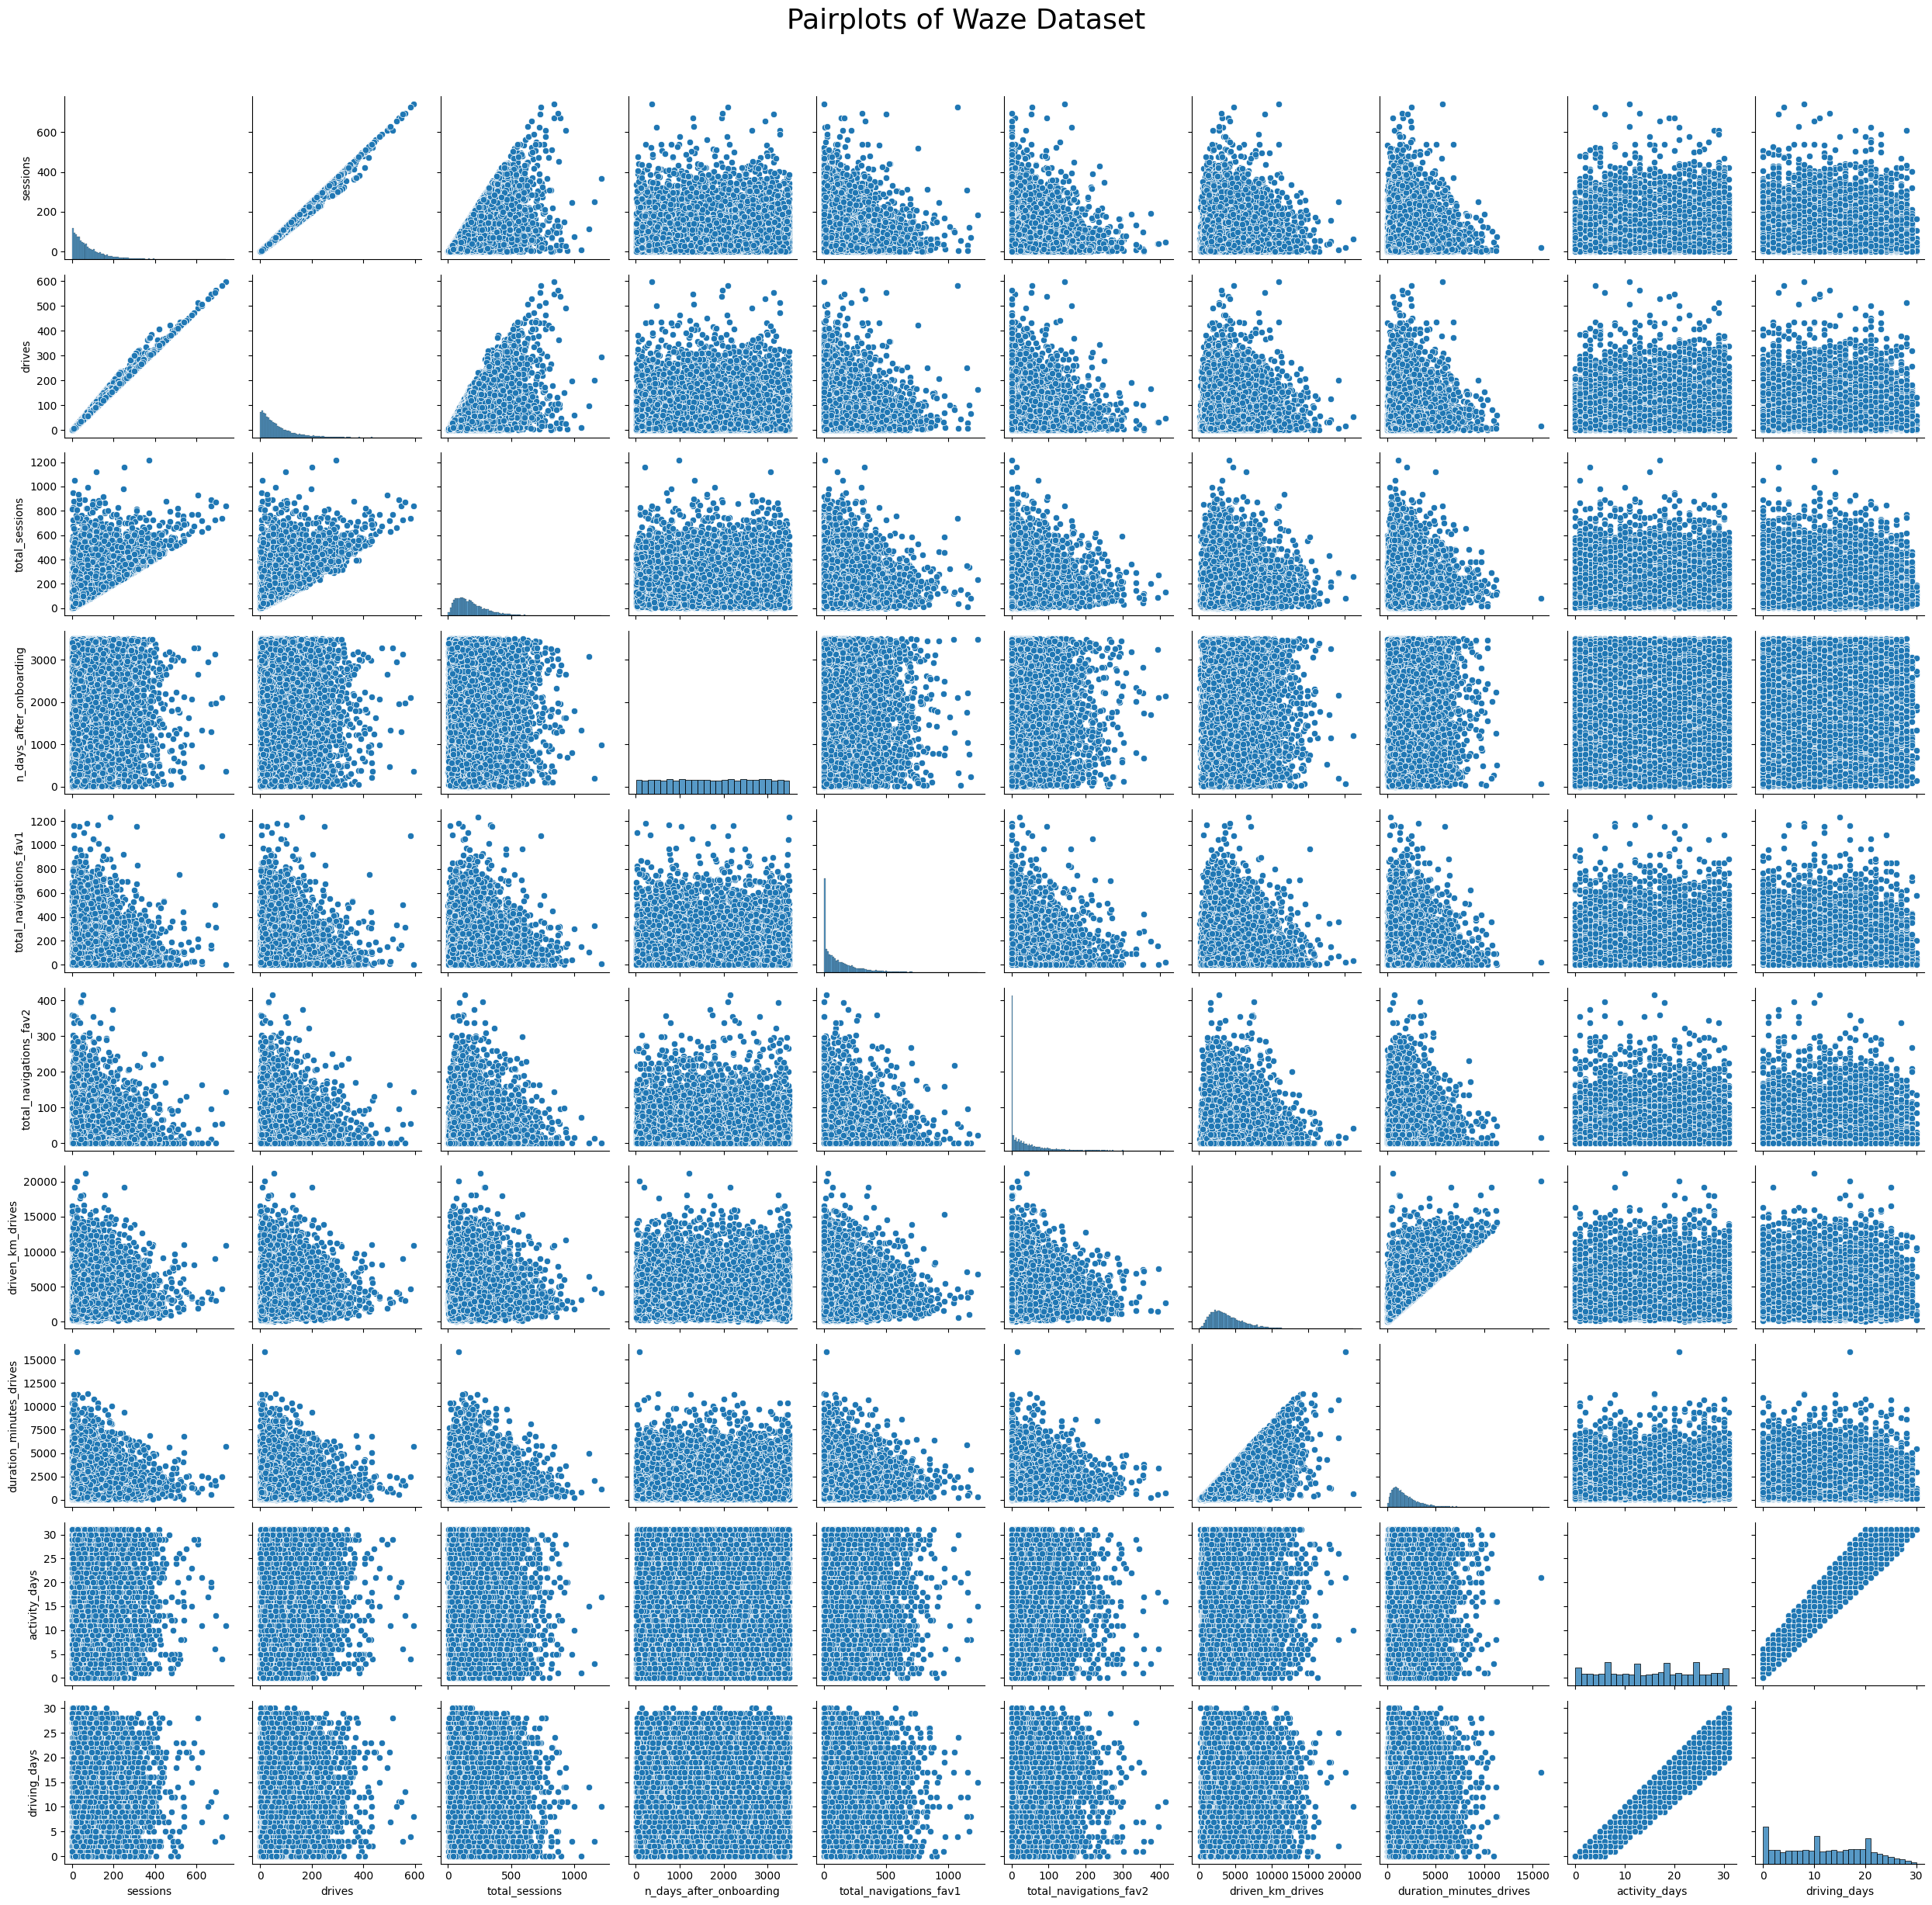

In [ ]:
sns.pairplot(data)
plt.suptitle('Pairplots of Waze Dataset', fontsize=26)

# Adjust layout and show the plots
plt.xticks(rotation=0)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**driven_km_drives vs. duration_minutes_drives:**

There's a strong positive linear relationship between driven kilometers and duration. This makes sense since more driving time typically results in greater distances traveled.

**driven_km_drives vs. total_sessions:**

A slightly positive correlation is seen, implying that users who drive more kilometers tend to have more sessions, though the relationship is weaker.

**drives vs. total_sessions:**

There is a clear positive correlation between the number of drives and total sessions. This suggests that users who drive more tend to have more total sessions, indicating frequent interaction with the platform.

**activity_days vs. driving_days:**

This pair shows a very strong positive linear correlation. It means that users who are active on more days also tend to drive on more days.

**n_days_after_onboarding vs. other variables:**

The feature n_days_after_onboarding appears mostly evenly distributed across other features, meaning the number of days after onboarding does not show any strong relationship with most driving behaviors or engagement metrics.

## Correlation Matrix

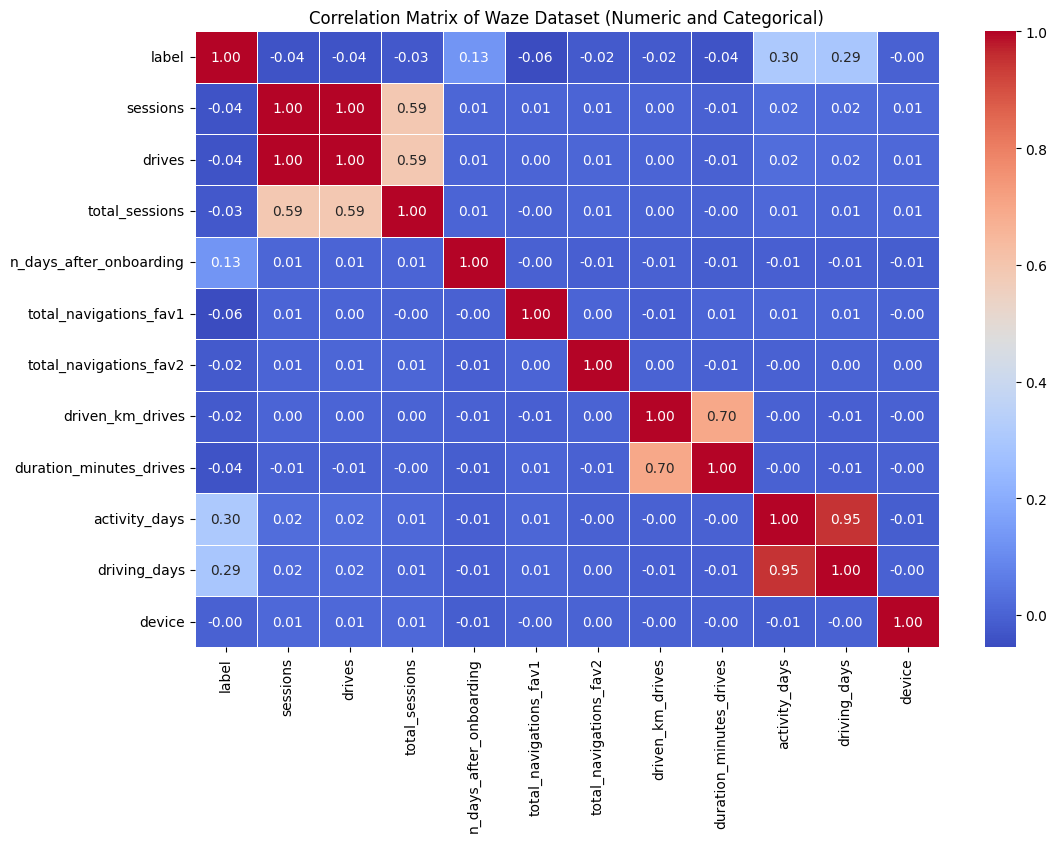

In [ ]:
# Select categorical columns
categorical_data = data.select_dtypes(include=['category'])

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le  # Store the encoder if you need to reverse the encoding later

# Now select all numeric columns (including newly encoded categorical columns)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Waze Dataset (Numeric and Categorical)')
plt.show()

In [ ]:
data = data.drop(columns=['sessions'])

We dropped sessions because there was multicollinearity with drives.

In [ ]:
data.shape

(14299, 11)

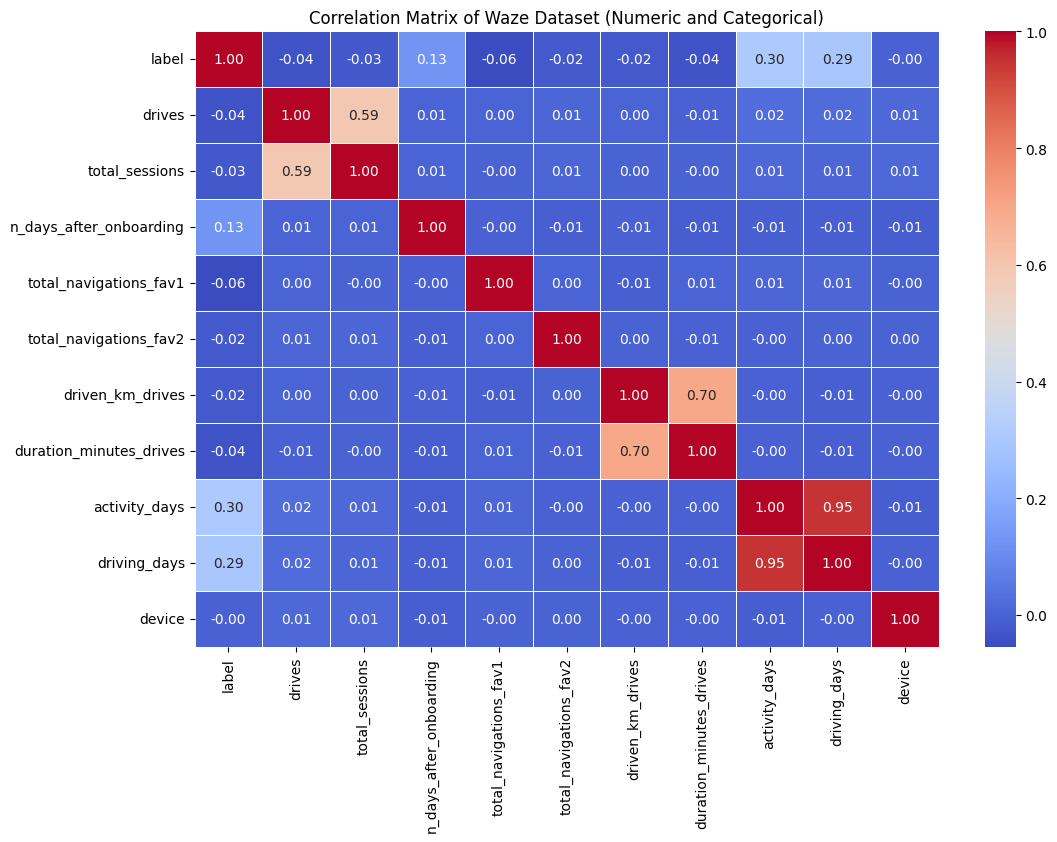

In [ ]:
# Now select all numeric columns (including newly encoded categorical columns)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Waze Dataset (Numeric and Categorical)')
plt.show()

In the correlation plot above we removed 'sessions' since it had too much correlation with drives, which meant that it was useless to have in the dataset, since it would give useless data. Since there are many correlations, there are only going to be the top 3 for positive and negative correlations below.

**Top 3 Positive Correlations:**

1. Activity_days and driving_days have a correlation of 0.95. This means that users who have more active days also tend to have more driving days, indicating that activity on the platform is strongly linked to driving behavior.

2. Driven_km_drives and duration_minutes_drives have a correlation of 0.70. This means that users who drive longer distances also tend to spend more time driving, showing a strong relationship between kilometers driven and driving time.

3. Drives and total_sessions have a correlation of 0.59. This suggests that users with more driving sessions also tend to have a higher total number of sessions, indicating that driving frequency is associated with overall platform engagement.

**Top 3 Negative Correlations:**

1. Label and total_navigations_fav1 have a correlation of -0.06. This weak negative correlation suggests that churned users might use their first favorite navigation slightly less often than retained users, though the relationship is weak.

2. Label and driven_km_drives have a correlation of -0.04. This indicates that churned users tend to drive slightly fewer kilometers compared to retained users, although the relationship is very weak.

3. Label and duration_minutes_drives have a correlation of -0.04. This suggests that churned users spend slightly less time driving compared to retained users, but again, the relationship is weak.



In [ ]:
data['label'].value_counts()

label
1    11763
0     2536
Name: count, dtype: int64

This allows us to understand that 0 is Churned while 1 is Retained.

## Scatterplot of Activity Days vs Driving Days

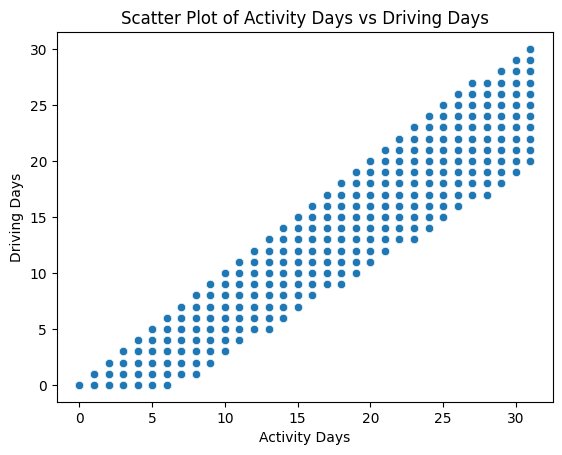

In [ ]:
# Scatter plot between 'activity_days' and 'driving_days'
sns.scatterplot(x='activity_days', y='driving_days', data=data)
plt.title('Scatter Plot of Activity Days vs Driving Days')
plt.xlabel('Activity Days')
plt.ylabel('Driving Days')  # Fixed missing closing quote
plt.show()

The scatter plot shows a nearly perfect linear relationship between activity days and driving days, suggesting that as the number of activity days increases, driving days also increase proportionally for users.

## Average Total Sessions by Label

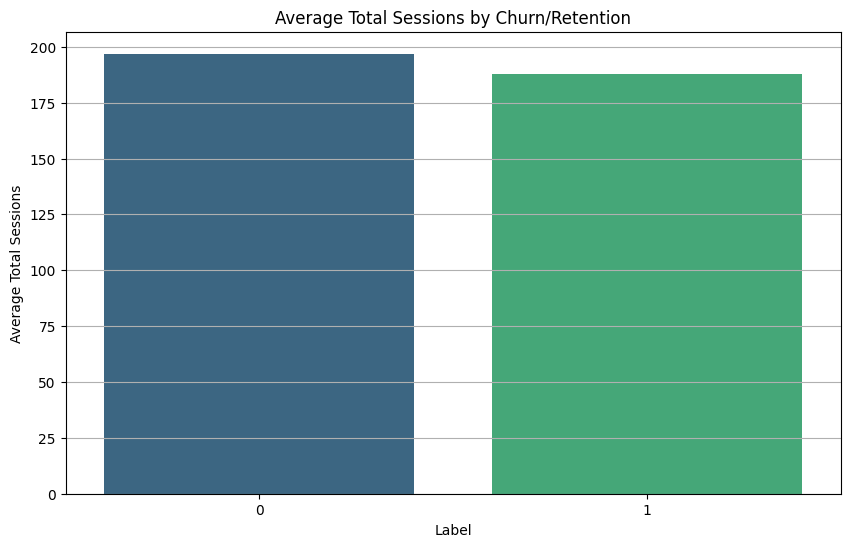

In [ ]:
# Calculate the mean total_sessions for each label
mean_sessions = data.groupby('label')['total_sessions'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='total_sessions', data=mean_sessions, palette='viridis')
plt.title('Average Total Sessions by Churn/Retention')
plt.xlabel('Label')
plt.ylabel('Average Total Sessions')
plt.grid(axis='y')
plt.show()

The bar chart shows that users who churn (labeled as 0) and retained users (labeled as 1) have almost the same average number of total sessions, indicating similar engagement in terms of total session counts for both groups.

# Multivariate Analysis

## Activity Days vs Driving Days colored by Label

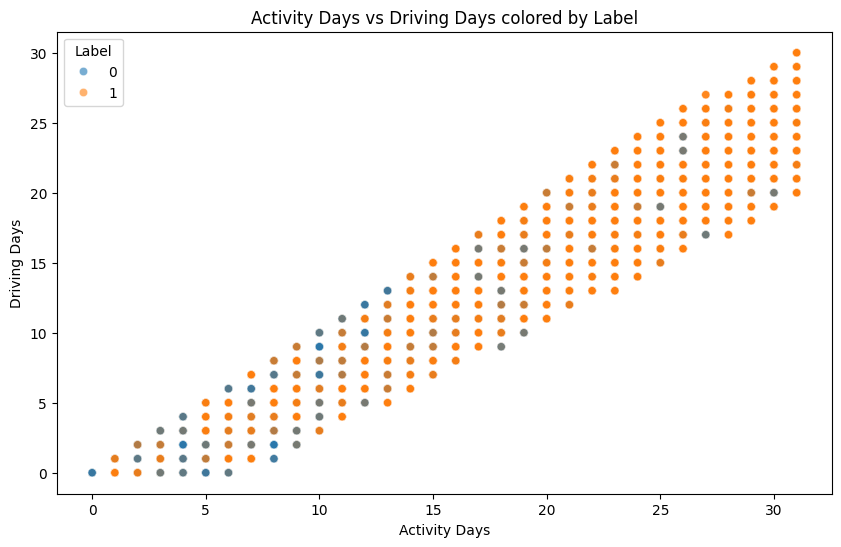

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='activity_days', y='driving_days', hue='label', data=data, alpha=0.6)
plt.title('Activity Days vs Driving Days colored by Label')
plt.xlabel('Activity Days')
plt.ylabel('Driving Days')
plt.legend(title='Label', loc='upper left')
plt.show()

Higher Activity and Driving Days (towards the top right) seem to correlate with retained customers (orange dots).
Lower Activity and Driving Days (towards the bottom left) are more often associated with churned customers (blue dots).
There appears to be a general upward trend, indicating that as Activity Days increase, Driving Days tend to increase as well.

But after conducting a hypothesis testing of these variables compared to the target. The conclusion is that there is no strong relationship between  of driving days and activity as both these variables have weak correlations of 0.30 for activity days and 0.29 for driving days.

## Driven KM vs Duration Minutes colored by Label

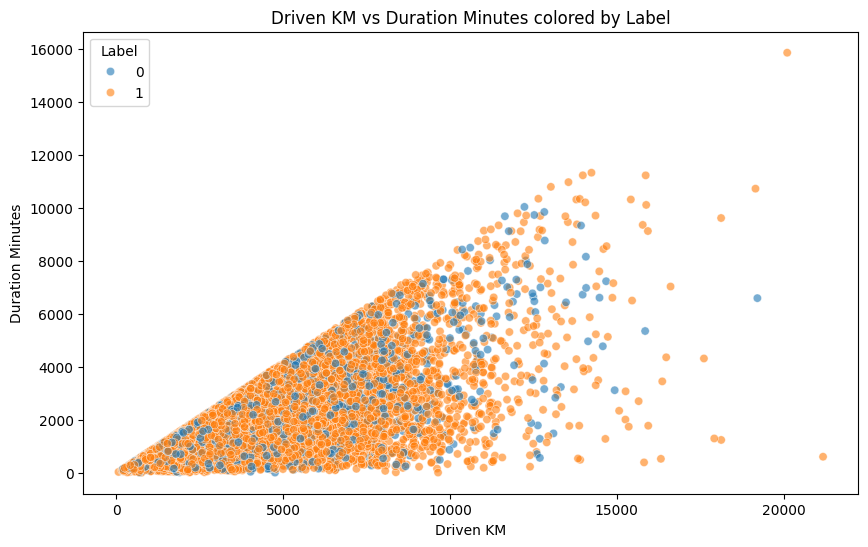

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='driven_km_drives', y='duration_minutes_drives', hue='label', data=data, alpha=0.6)
plt.title('Driven KM vs Duration Minutes colored by Label')
plt.xlabel('Driven KM')
plt.ylabel('Duration Minutes')
plt.legend(title='Label', loc='upper left')
plt.show()

The scatter plot shows the relationship between driven kilometers and duration minutes, with points colored by label (0 = churned, 1 = retained). There is a strong linear correlation between driven kilometers and duration, but both retained and churned users exhibit similar distributions, indicating that driven distance and driving time alone do not significantly differentiate between churn and retained users.

## Total Sessions vs Duration Minutes colored by Label

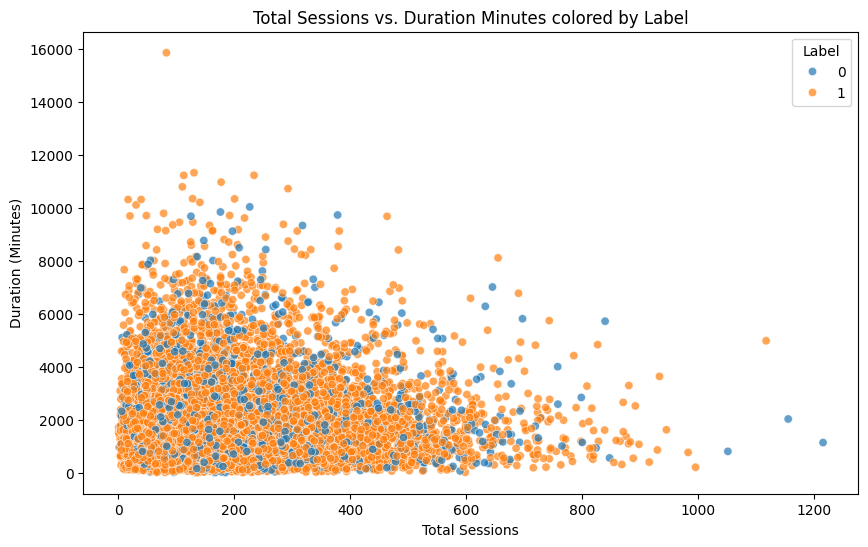

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sessions', y='duration_minutes_drives', hue='label', data=data, alpha=0.7)
plt.title('Total Sessions vs. Duration Minutes colored by Label')
plt.xlabel('Total Sessions')
plt.ylabel('Duration (Minutes)')
plt.legend(title='Label')
plt.show()

This scatter plot shows the relationship between total sessions and duration minutes, colored by churn (0) and retained (1). Although there is a positive relationship between total sessions and duration, both churned and retained users exhibit a similar distribution, implying that session count and session duration are not strong differentiators of churn versus retained on their own.

# Modeling

## Uniform Target

As we had previously noticed, there is an uneven distribution in the target variable 'label'.

There is more data regarding 'Retained' than 'Churned' (almost 82% of the data is 'Retained'), if we were to build a model with this distribution, the model would not perform well as it will be unable to identify and classify the 'Churned' data as it is mostly only trained on the 'Retained' data.

Hence, we will now be making the target data uniform.

In [ ]:
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data = pd.DataFrame(X_resampled, columns=X.columns)
data['label'] = y_resampled

# Check class distribution after balancing
print(data['label'].value_counts())

label
1    11763
0    11763
Name: count, dtype: int64


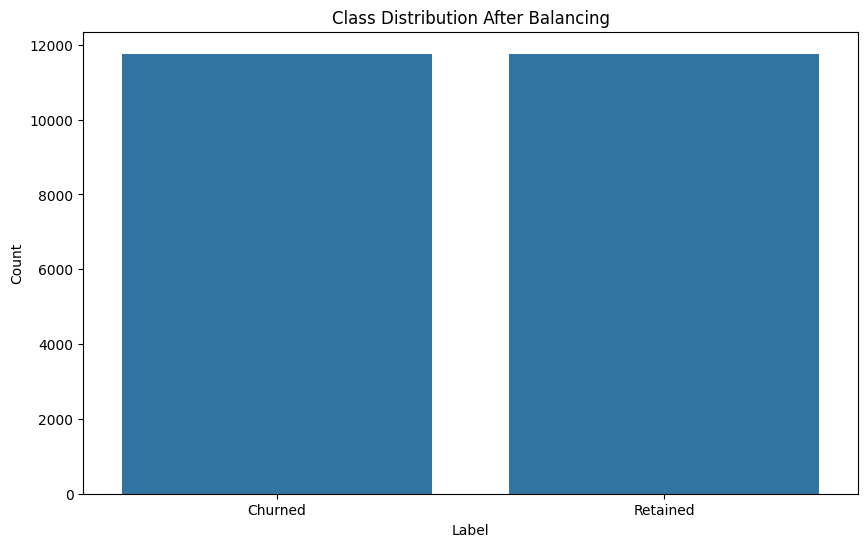

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data)
labels = ['Churned', 'Retained']
plt.title('Class Distribution After Balancing')
plt.xticks(range(len(labels)), labels)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

####Insight/ Analysis

**Problem: Imbalanced Target Variable**
- The dataset has an imbalanced distribution where about 82% of the target variable ('label')
  belongs to the 'Retained' class, and the rest are 'Churned'. This imbalance can affect model performance,
  especially for predicting 'Churned' instances, as the model may become biased toward the 'Retained' class.

**Solution: Balancing the Target Variable with SMOTE**
- We use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples for
  the minority class ('Churned') to create a balanced dataset.
- This technique helps the model better learn the patterns of the minority class.

**Step 1: Separate Features and Target**
X = data.drop(columns=['label'])  # Features (drop the 'label' column)
y = data['label']  # Target variable (which we will balance)

**Step 2: Apply SMOTE to Balance the Dataset**
from imblearn.over_sampling import SMOTE

- SMOTE will generate synthetic instances for the minority class ('Churned')
smote = SMOTE(random_state=42)  # Setting random_state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

**Step 3: Create a New Balanced Dataset**
- Convert the resampled features and target back into a DataFrame
data = pd.DataFrame(X_resampled, columns=X.columns)
data['label'] = y_resampled  # Add the resampled target variable back to the data

**Step 4: Check the Class Distribution After Balancing**
- This is an important step to ensure that the dataset is now balanced
print(data['label'].value_counts())

**Insight:**
- After applying SMOTE, both the 'Retained' and 'Churned' classes have equal representation,
  as shown by the output. This balanced distribution will help the model perform better on predicting 'Churned' instances.

**Expected Outcome:**
- The balanced dataset will improve model performance in terms of:
  - Recall and Precision for the minority class ('Churned')
  - F1-Score for overall performance, especially for the minority class
  - Reduced bias toward the majority class ('Retained')

**Caveat:**
- While SMOTE balances the dataset, it may introduce noise or lead to overfitting if not carefully validated.
- Therefore, it is important to apply model validation techniques like cross-validation to ensure generalizability.

## Baseline

### Logistic Regression

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

Accuracy: 71.53%


#### Analysis - Data Splitting and Scaling
1. **Data Splitting and Scaling:**

- The data is split into features (X) and target (y), where 'label' is the target variable representing whether a user is 'Churned' or 'Retained.'
- The dataset is further divided into training (80%) and testing (20%) sets to evaluate the model’s performance on unseen data.
- A StandardScaler is applied to normalize the features. This is crucial for Logistic Regression since it assumes that the features are on similar scales,
  and it prevents any one feature from dominating the learning process. Features with larger ranges might otherwise skew the model.

2. **Logistic Regression Training:**

- A Logistic Regression model is trained on the scaled training data. Logistic Regression is a simple yet powerful method for binary classification,
  predicting the probability of a sample belonging to one of two classes (here, 'Churned' or 'Retained').
- It uses a linear equation and a logistic (sigmoid) function to map predicted probabilities to one of the two target classes.

3. **Model Performance:**

- The model achieved an accuracy of 71.53% on the test set. Accuracy is the proportion of correct predictions out of total predictions.
- While 71.53% is a moderately good result, accuracy alone may not be sufficient to judge model performance, especially in the case of imbalanced data
  (e.g., if the number of 'Retained' instances heavily outweighs 'Churned' instances).

In [ ]:
# Get the model's coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients with the feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients (optional, for easier interpretation)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the coefficients along with the feature names
print(coef_df)

                   Feature  Coefficient
7            activity_days     0.753636
2  n_days_after_onboarding     0.438270
8             driving_days     0.366061
9                   device     0.356551
5         driven_km_drives     0.029825
1           total_sessions     0.006062
4   total_navigations_fav2    -0.019892
6  duration_minutes_drives    -0.099894
0                   drives    -0.109051
3   total_navigations_fav1    -0.132621


#### Analysis Feature Importance

4. **Feature Importance (Coefficients):**

- The model’s coefficients reveal the importance of different features in predicting the target variable:
  - Positive coefficients indicate that an increase in that feature increases the likelihood of churn.
  - Negative coefficients indicate that an increase in that feature decreases the likelihood of churn.

- **Key insights from the coefficients:**

  - Activity days (0.753636) has the strongest positive influence on churn, meaning users who are active for more days are more likely to churn.
  - n_days_after_onboarding (0.438270) and driving days (0.366061) also positively contribute to churn likelihood.
  - Total navigations to favorite 1 location (-0.132621) and drives (-0.109051) have negative coefficients, indicating that users who navigate to their favorite locations more often and drive more are less likely to churn.

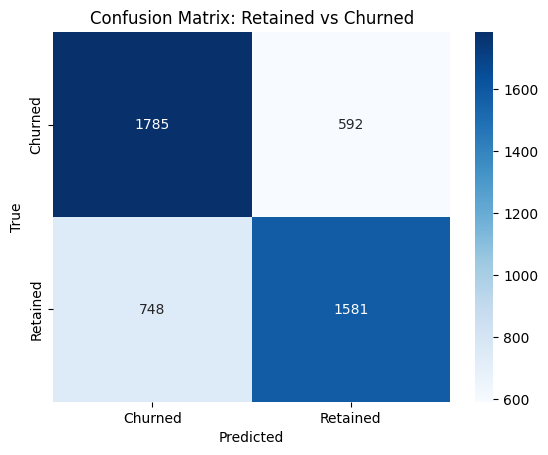

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Overall  Analysis of Logistic Regression:

- Moderate Accuracy: The model’s accuracy of 71.53% shows reasonable classification performance,
  but it could likely benefit from improvements, particularly for classifying the minority 'Churned' class more effectively.
- Feature Influence: The analysis of coefficients highlights the most impactful features driving churn behavior,
  with features like activity days and n_days_after_onboarding being the strongest indicators of churn.
- Potential for Improvement: Given the false negatives observed in the confusion matrix, further improvements could involve addressing class imbalance
  (using techniques like SMOTE) or testing more complex models (such as Random Forest or XGBoost) that could capture more complex relationships in the data.

- By focusing on these areas, the model could be enhanced to better predict churn while maintaining interpretability.

### Decision Tree Classifier

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

Accuracy: 72.72%


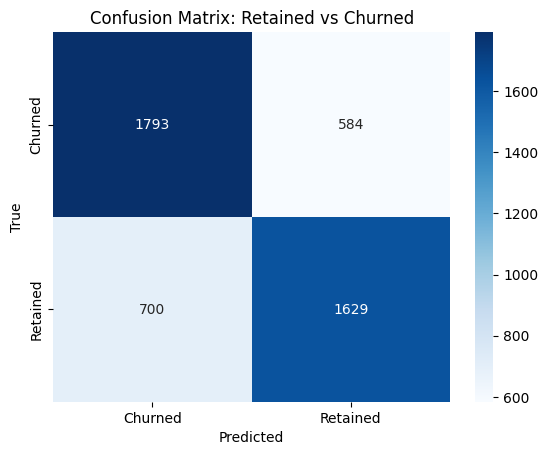

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Decision Tree Model:**

**Model Training and Accuracy:**
- The Decision Tree classifier was trained on the scaled dataset, with an accuracy of 72.72%.This indicates a slight improvement over the Logistic Regression model (which had 71.53% accuracy).
- While this accuracy is moderately good, it still suggests there are some misclassifications,
which are better understood through the confusion matrix.

**Confusion Matrix Breakdown:**
- True Positives (1793): The number of correctly classified 'Churned' users.
- True Negatives (1629): The number of correctly classified 'Retained' users.
- False Positives (700): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (584): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**

- The confusion matrix shows the model performs reasonably well in classifying both 'Churned' and 'Retained' users. However, there is a relatively high number of false negatives (584), which indicates the model is struggling to identify 'Churned' users correctly.

- This is important because, in a business context, misclassifying a 'Churned' user as 'Retained' could mean missed opportunities for customer retention efforts.

### Naive Bayes

In [ ]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)

Accuracy: 70.46%


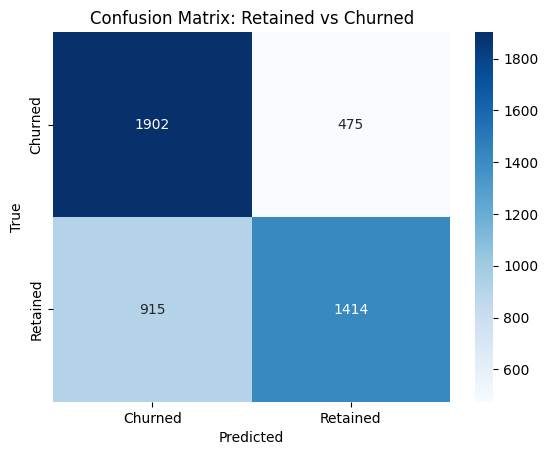

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Gaussian Naive Bayes Model:**

**Model Training and Accuracy:**
- The Gaussian Naive Bayes classifier was trained on the scaled dataset, yielding an accuracy of 70.46%.
- This is slightly lower than both the Decision Tree and Logistic Regression models (which had accuracies of 72.72% and 71.53%, respectively).
- While Naive Bayes is a simple and fast model, its lower accuracy indicates that it may not be as effective as other models for this particular dataset.

**Confusion Matrix Breakdown:**
- True Positives (1902): The number of correctly classified 'Churned' users.
- True Negatives (1414): The number of correctly classified 'Retained' users.
- False Positives (915): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (475): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The confusion matrix shows that while the Gaussian Naive Bayes model performs reasonably well, it struggles more with false positives (915) compared to other models.
- The high number of false positives suggests that the model incorrectly predicts too many users as 'Churned,' which could lead to unnecessary retention actions for 'Retained' users.
- The false negatives (475) are fewer than in the Decision Tree model, which indicates that the Naive Bayes model is slightly better at correctly identifying 'Churned' users, but this comes at the cost of misclassifying many 'Retained' users.


### Random Forest Classifier

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

Accuracy: 80.00%


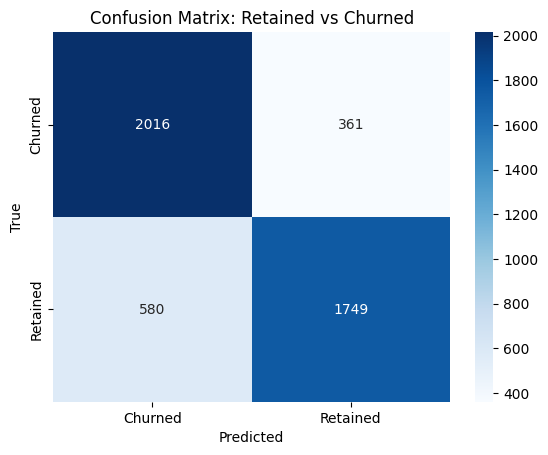

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Random Forest Model:**

**Model Training and Accuracy:**
- The Random Forest classifier was trained with 100 estimators, yielding an accuracy of **80.00%**.
- This is a significant improvement over previous models (Logistic Regression, Decision Tree, and Gaussian Naive Bayes), which had accuracies ranging from 70.46% to 72.72%.
- The higher accuracy of the Random Forest model suggests that it can capture more complex patterns in the data due to its ensemble nature, where multiple decision trees are combined to make predictions.

**Confusion Matrix Breakdown:**
- True Positives (2016): The number of correctly classified 'Churned' users.
- True Negatives (1749): The number of correctly classified 'Retained' users.
- False Positives (580): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (361): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The confusion matrix shows a substantial improvement in the Random Forest model’s ability to correctly classify both 'Churned' and 'Retained' users.
With a lower number of false negatives (361), the model performs well in identifying 'Churned' users, which is crucial for customer retention strategies.
- The reduced number of false positives (580) also indicates that fewer 'Retained' users are mistakenly predicted as 'Churned,' which helps avoid unnecessary retention actions.


### Gradient Boosting Classifier

In [ ]:
# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

Accuracy: 74.31%


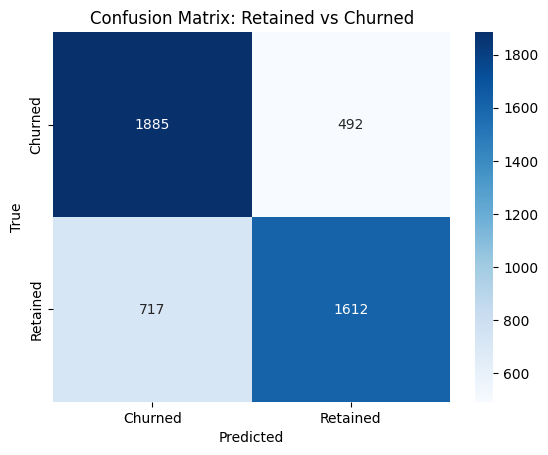

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Gradient Boosting Model:**

**Model Training and Accuracy:**
- The Gradient Boosting classifier was trained on the scaled dataset and achieved an accuracy of **74.31%**.
- While this accuracy is higher than models like Logistic Regression, Decision Tree, and Gaussian Naive Bayes, it is still lower than the Random Forest model (80.00%).
- Gradient Boosting is known for its strong predictive performance, as it builds trees sequentially, correcting the errors of the previous trees.
- However, the slightly lower accuracy compared to Random Forest suggests that further tuning may be needed to unlock its full potential.

**Confusion Matrix Breakdown:**
- True Positives (1885): The number of correctly classified 'Churned' users.
- True Negatives (1612): The number of correctly classified 'Retained' users.
- False Positives (717): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (492): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The Gradient Boosting model performs reasonably well in predicting both 'Churned' and 'Retained' users.
- However, with **492 false negatives**, it seems the model struggles slightly in identifying 'Churned' users, which could be a concern for retention strategies.
- Additionally, **717 false positives** indicate that the model occasionally misclassifies 'Retained' users as 'Churned,' potentially leading to unnecessary retention actions.

### KNN

In [ ]:
# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

Accuracy: 75.44%


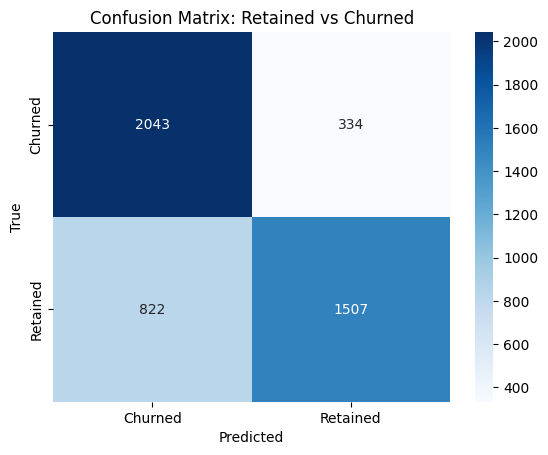

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the K-Nearest Neighbors (KNN) Model:**

**Model Training and Accuracy:**
- The K-Nearest Neighbors (KNN) classifier was trained on the scaled dataset and achieved an accuracy of **75.44%**.
- This accuracy is higher than models like Gradient Boosting (74.31%), but still lower than Random Forest (80.00%).
- KNN is a simple algorithm that assigns a label to a data point based on the majority vote of its k-nearest neighbors, making it highly interpretable but sensitive to feature scaling and parameter tuning.

**Confusion Matrix Breakdown:**
- True Positives (2043): The number of correctly classified 'Churned' users.
- True Negatives (1507): The number of correctly classified 'Retained' users.
- False Positives (822): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (334): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The KNN model performs well in predicting both 'Churned' and 'Retained' users, especially with only **334 false negatives**, which indicates it is relatively good at identifying 'Churned' users.
- However, the model misclassified **822 'Retained'** users as 'Churned,' which is higher than in some other models. This suggests that the KNN algorithm may sometimes be overly sensitive in flagging users as 'Churned' when they should be classified as 'Retained.'
- The performance of KNN can be highly influenced by the choice of hyperparameters, especially the value of k (the number of neighbors considered), and distance metrics used.


### Support Vector Classifier

In [ ]:
# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred)
roc_auc_svc = auc(fpr_svc, tpr_svc)

Accuracy: 73.33%


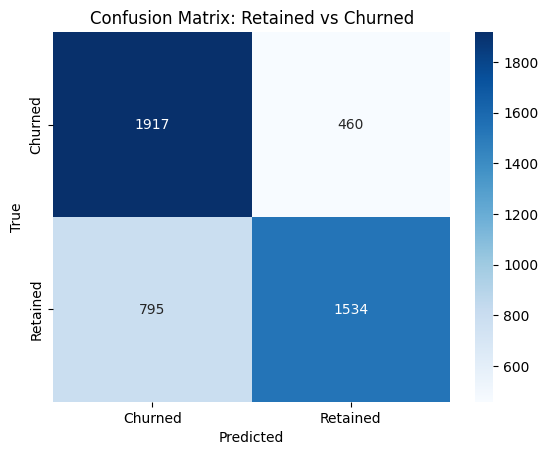

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Support Vector Machine (SVM) Model:**

**Model Training and Accuracy:**
- The Support Vector Machine (SVM) classifier with an RBF (Radial Basis Function) kernel was trained on the scaled dataset, resulting in an accuracy of **73.33%**.
- This accuracy is lower than models such as Random Forest (80.00%) and KNN (75.44%), but higher than the Gaussian Naive Bayes (70.46%).
- SVMs are effective for high-dimensional spaces and are particularly powerful when the number of features exceeds the number of samples. However, they can be computationally expensive, especially when using non-linear kernels like RBF.

**Confusion Matrix Breakdown:**
- True Positives (1917): The number of correctly classified 'Churned' users.
- True Negatives (1534): The number of correctly classified 'Retained' users.
- False Positives (795): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (460): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The SVM model shows a reasonable balance between predicting 'Churned' and 'Retained' users, though it struggles with **795 false positives**, which indicates a tendency to incorrectly classify 'Retained' users as 'Churned.'
- The model's **460 false negatives** suggest that while it performs well in identifying 'Churned' users, there is still room for improvement to reduce misclassifications.
- SVM is sensitive to the choice of kernel and hyperparameters, so further tuning could yield better results.

## Logistic Regression



### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 4  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Train the logistic regression model on the selected features
model = LogisticRegression()
model.fit(X_train_kbest, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['n_days_after_onboarding', 'activity_days', 'driving_days', 'device'], dtype='object')
Accuracy: 71.31%


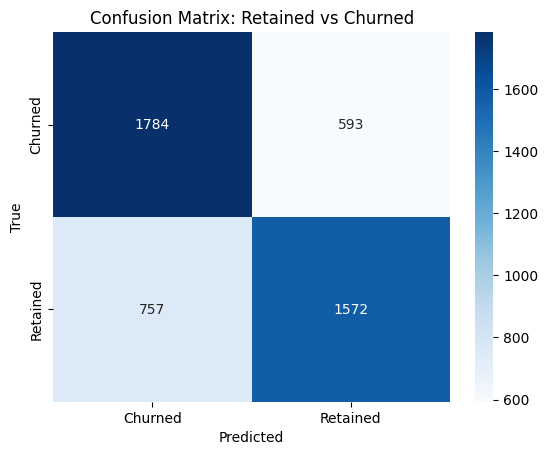

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Logistic Regression Model with KBest:**

**Model Training and Accuracy:**
- The Logistic Regression model was trained on the features selected by **SelectKBest**, which used the chi-squared test to select the top 4 features from the dataset.
- The selected features are: **n_days_after_onboarding, activity_days, driving_days, and device**.
- The model achieved an accuracy of **71.31%**, which is comparable to previous models but slightly lower than some others such as Random Forest or Gradient Boosting.

**Confusion Matrix Breakdown:**
- True Positives (1784): The number of correctly classified 'Churned' users.
- True Negatives (1572): The number of correctly classified 'Retained' users.
- False Positives (757): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (593): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The model's **accuracy of 71.31%** suggests that it performs reasonably well with the reduced feature set selected by KBest. However, it still struggles with **false negatives** (593), meaning that some users who churned were incorrectly classified as retained.
- The **feature selection process** highlights which factors are the most impactful in predicting churn, with **n_days_after_onboarding** and **activity_days** being particularly important.
- The high number of **false positives** (757) indicates that the model sometimes misclassifies retained users as churned, which could lead to unnecessary customer retention efforts.

### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Train the logistic regression model on the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_lr_lasso, tpr_lr_lasso, _ = roc_curve(y_test, y_pred)
roc_auc_lr_lasso = auc(fpr_lr_lasso, tpr_lr_lasso)

Selected Features: ['drives', 'n_days_after_onboarding', 'total_navigations_fav1', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device']
Accuracy: 71.50%


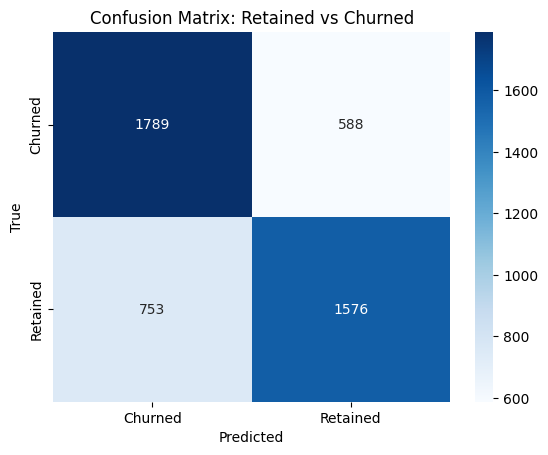

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Logistic Regression Model with Lasso Feature Selection:**

**Model Training and Accuracy:**
- The Lasso model was applied to the dataset with an alpha value of **0.01** to perform feature selection by driving some coefficients to zero.
- The selected features based on non-zero coefficients are: **['drives', 'n_days_after_onboarding', 'total_navigations_fav1', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device']**.
- After selecting these features, a Logistic Regression model was trained and achieved an accuracy of **71.50%**, slightly better than the model using KBest for feature selection (71.31%).

**Confusion Matrix Breakdown:**
- True Positives (1789): The number of correctly classified 'Churned' users.
- True Negatives (1576): The number of correctly classified 'Retained' users.
- False Positives (753): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (588): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The **accuracy of 71.50%** shows a moderate improvement in model performance compared to previous models using Logistic Regression, indicating that the Lasso feature selection was successful in identifying useful features.
- However, the model still has **588 false negatives**, meaning it occasionally misclassifies users who churn as retained, which can be critical for business retention efforts.
- The **selected features** emphasize the importance of user activity and onboarding time, which play a significant role in predicting churn behavior.

### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic regression model
logistic_model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression with PCA Accuracy: {accuracy * 100:.2f}%")

Logistic Regression with PCA Accuracy: 71.53%


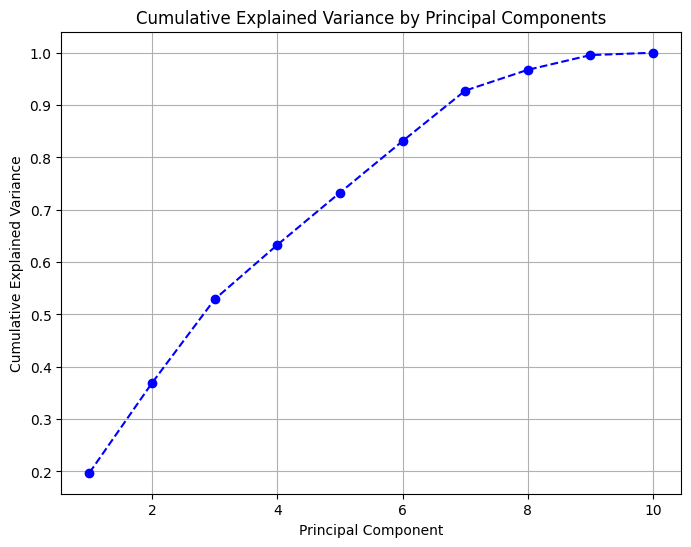

In [ ]:
# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic regression model
logistic_model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression with PCA Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Logistic Regression with PCA Accuracy: 69.74%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   

   total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
0               -0.008579         -0.113421                -0.127105   
1                0.014225          0.687215                 0.681827   
2                0.023775         -0.117125                -0.133355   

   activity_days  driving_days    device  
0       0.689772      0.690468  0.105640  
1       0.113659      0.108424 -

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic regression model
logistic_model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression with PCA Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Logistic Regression with PCA Accuracy: 71.31%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   


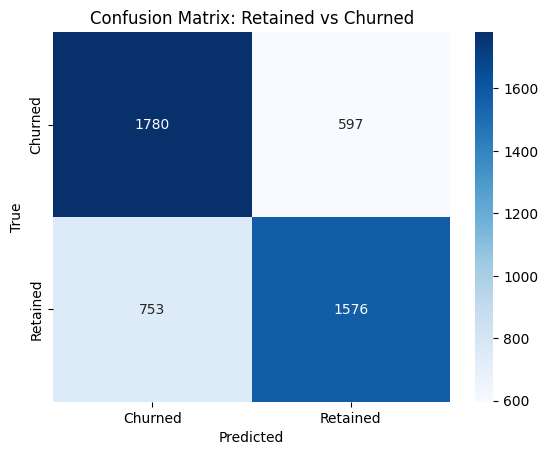

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Logistic Regression Model with PCA:**

**Model Training and Accuracy:**
- The Logistic Regression model was trained using **Principal Component Analysis (PCA)** with 7 components to reduce dimensionality while retaining important variance in the data.
- The model achieved an accuracy of **71.31%**, which is comparable to previous Logistic Regression models without PCA. This suggests that PCA did not significantly improve performance, but it did allow the model to focus on the most important variance in the dataset.

**PCA Components Explained Variance:**
- PC1 explains 19.8% of the variance, meaning it captures the highest but still a limited portion of the dataset’s information. This suggests that PC1 alone isn't sufficient for accurate prediction.

- PC2 adds 17.2% of the variance, and PC3 accounts for 16%. Together, the top three components explain 52.9% of the variance, which isn't enough to fully represent the dataset's complexity.

- The first 7 components collectively explain 92.7% of the total variance, showing that by using 7 principal components, the model retains most of the dataset's essential information, although each additional component beyond PC3 contributes progressively less.

- Despite retaining most of the variance by using 7 components, no single component captures more than 20% of the variance, indicating that the dataset's structure is dispersed across multiple features, which limits the predictive power of any single component.

**Confusion Matrix Breakdown:**
- True Negative (1780): The number of correctly classified 'Churned' users.
- True Positives (1576): The number of correctly classified 'Retained' users.
- False Positives (597): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (753): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**PCA Feature Weights:**
- The feature weights from the PCA show which original variables contribute most to each principal component. For example:
  - **PC1** is heavily influenced by **activity_days** and **driving_days**, indicating that user activity is a key factor in explaining variance.
  - **PC3** is dominated by **drives** and **total_sessions**, suggesting that driving behavior also plays a significant role in predicting churn.
  - **PC4** shows a strong contribution from **n_days_after_onboarding** and **total_navigations_fav1**, which highlights the importance of early user behavior.

**Interpretation:**
- The PCA transformation effectively reduced the feature set while retaining a high amount of explained variance. However, the model still struggles with **false negatives** (597), meaning it occasionally misclassifies churned users as retained, which can be costly in a real-world business context.
- The feature contributions show that **activity days**, **driving behavior**, and early engagement with the platform are strong indicators of whether a user will churn or be retained.

### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 5 features
top_5_features = sorted_feature_names[:5]

print("\nTop 5 Features:")
print(top_5_features)

# Create new training and testing sets with only the top 5 features
X_train_top_5 = X_train_scaled[:, sorted_indices[:5]]
X_test_top_5 = X_test_scaled[:, sorted_indices[:5]]

# Train the logistic regression model on the selected features
model = LogisticRegression()
model.fit(X_train_top_5, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_top_5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Top 5 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives',
       'driven_km_drives', 'total_sessions'],
      dtype='object')
Accuracy: 70.48%


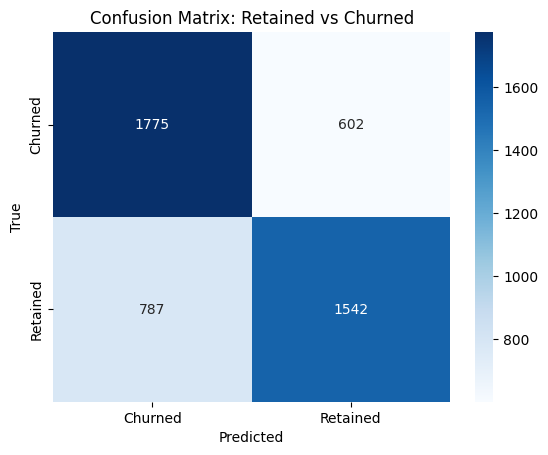

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Logistic Regression Model with Top 5 Features Selected by Decision Tree:**

**Model Training and Accuracy:**
- A **Decision Tree Classifier** was used to rank the importance of features, and the top 5 features were selected for training a Logistic Regression model.
- The selected top 5 features are: **activity_days, n_days_after_onboarding, duration_minutes_drives, driven_km_drives, and total_sessions**.
- After training the Logistic Regression model on these 5 features, it achieved an accuracy of **70.48%**, which is slightly lower compared to previous models (e.g., Logistic Regression with PCA at 71.31%).

**Confusion Matrix Breakdown:**
- True Positives (1775): The number of correctly classified 'Churned' users.
- True Negatives (1542): The number of correctly classified 'Retained' users.
- False Positives (787): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (602): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The **accuracy of 70.48%** indicates that using only the top 5 features selected by the Decision Tree for training a Logistic Regression model results in moderate performance. This suggests that while these features are influential, they may not capture the full complexity of the churn prediction task.
- The model still struggles with **false negatives** (602), where churned users are misclassified as retained, which is crucial to address for business strategies focused on retention.
- The **selected features** focus on user activity and engagement metrics, which are critical factors for predicting churn. However, the exclusion of other potentially important features could be causing the slight drop in accuracy.

### Interaction Terms

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame from the scaled training data for easier manipulation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Create the interaction term between 'n_days_after_onboarding' and 'activity_days'
X_train_scaled_df['onboarding_activity_days'] = (
    X_train_scaled_df['n_days_after_onboarding'] * X_train_scaled_df['activity_days']
)

# Repeat for the test set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled_df['onboarding_activity_days'] = (
    X_test_scaled_df['n_days_after_onboarding'] * X_test_scaled_df['activity_days']
)

# Now X_train_scaled_df and X_test_scaled_df include the interaction term
print("Training Data with Interaction Term:")
print(X_train_scaled_df.head())

print("\nTesting Data with Interaction Term:")
print(X_test_scaled_df.head())

Training Data with Interaction Term:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.837158        0.163841                -0.995240               -0.008335   
1  0.468558       -0.258872                -0.339082               -0.195815   
2  0.115985       -0.432387                 0.972241                1.290141   
3  0.644845       -0.327744                 1.392142               -0.869356   
4  0.580741       -0.228922                 1.006985                0.047215   

   total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
0                0.188847         -0.893527                -0.785106   
1                0.165780          0.036108                 0.954366   
2                0.419518         -0.781256                -0.522424   
3               -0.249429         -1.274921                -0.910851   
4               -0.687705         -0.742143                -0.762721   

   activity_days  driving_days    device  onboard

In [ ]:
# Define the feature set including the interaction term
X_train_final = X_train_scaled_df
X_test_final = X_test_scaled_df

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic regression model
logistic_model.fit(X_train_final, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_final)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 71.48%


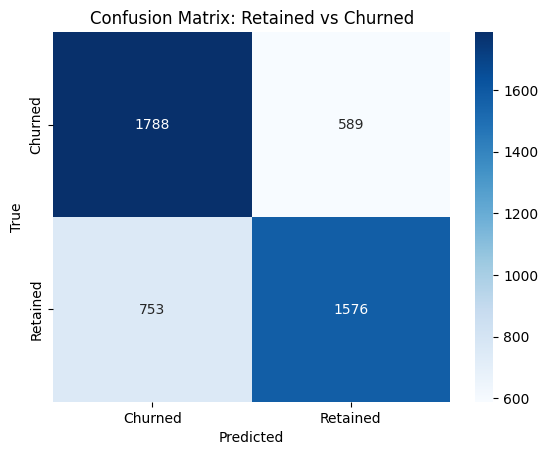

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of Logistic Regression Model with Interaction Term:**

**Model Training and Accuracy:**
- A new feature, **onboarding_activity_days**, was created by interacting the variables **n_days_after_onboarding** and **activity_days** to capture the relationship between early user engagement and their activity levels.
- After incorporating this interaction term into the dataset, the Logistic Regression model was trained and achieved an accuracy of **71.48%**, which is comparable to models without the interaction term, such as PCA (71.31%).

**Confusion Matrix Breakdown:**
- True Positives (1788): The number of correctly classified 'Churned' users.
- True Negatives (1576): The number of correctly classified 'Retained' users.
- False Positives (753): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (589): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The **accuracy of 71.48%** indicates that adding an interaction term slightly improves the model's performance, but it is not a significant leap from the previous models without this term. This suggests that while the interaction between **n_days_after_onboarding** and **activity_days** might add some information, it doesn't drastically change the model’s overall accuracy.
- The model continues to have a considerable number of **false negatives** (589), which means it struggles to identify churned users accurately. This misclassification could lead to challenges in retention strategies if churned users are classified as retained.


## Decision Tree Classifier

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 1  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['driving_days'], dtype='object')
Accuracy: 69.02%


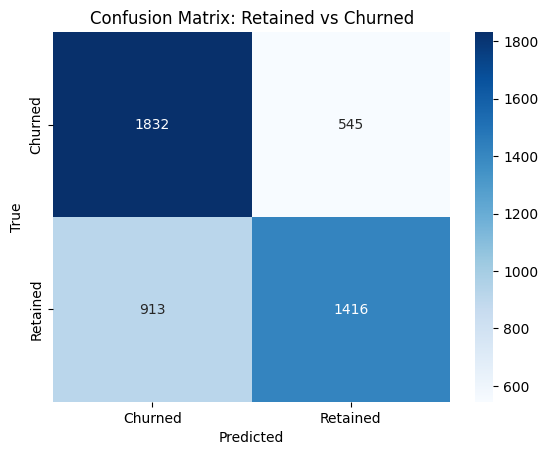

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Decision Tree Model with SelectKBest (k=1):**

**Model Training and Accuracy:**
- Using **SelectKBest** with the **chi-squared** test, only the top feature, **driving_days**, was selected for training the Decision Tree model.
- The model achieved an accuracy of **69.02%**, which is lower than previous models that used more features. This indicates that while **driving_days** is an important feature, using just one feature limits the model’s ability to capture the complexity of the data.

**Confusion Matrix Breakdown:**
- True Positives (1832): The number of correctly classified 'Churned' users.
- True Negatives (1416): The number of correctly classified 'Retained' users.
- False Positives (913): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (545): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The model’s **accuracy of 69.02%** suggests that while **driving_days** is a significant predictor, using only one feature oversimplifies the prediction task. The large number of **false positives** (913) indicates that the model frequently misclassifies retained users as churned, leading to potential inefficiencies in retention strategies.
- The **false negatives** (545) suggest that the model also struggles to correctly identify churned users, which can be detrimental for customer retention efforts.

### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['activity_days', 'driving_days']
Accuracy: 70.27%


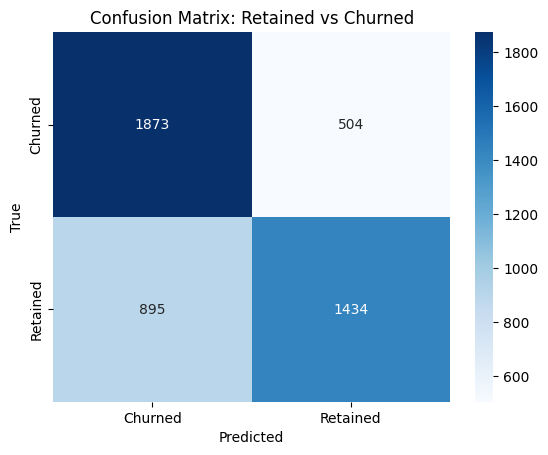

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Decision Tree Model with Lasso Feature Selection:**

**Model Training and Accuracy:**
- The **Lasso model** was applied to perform feature selection with an alpha value of **0.1**, which helped in selecting only the features with non-zero coefficients.
- The selected features are: **activity_days** and **driving_days**. These two features were identified as the most influential for predicting churn based on the Lasso regression.
- The Decision Tree model trained on these selected features achieved an accuracy of **70.27%**, which is slightly lower compared to models with more features or alternative selection methods. This suggests that these two features alone may not fully capture the complexity of the churn prediction task.

**Confusion Matrix Breakdown:**
- True Positives (1873): The number of correctly classified 'Churned' users.
- True Negatives (1434): The number of correctly classified 'Retained' users.
- False Positives (895): Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- False Negatives (504): Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The **accuracy of 70.27%** suggests that while **activity_days** and **driving_days** are important features, using only these two features leads to a drop in accuracy and an increase in misclassifications compared to models that include more features.
- The relatively high number of **false negatives** (504) indicates that the model struggles to correctly identify churned users when trained on just these two features, which could be a concern for retention strategies.
- The high number of **false positives** (895) implies that the model often misclassifies retained users as churned, potentially leading to unnecessary retention efforts.


### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.23%


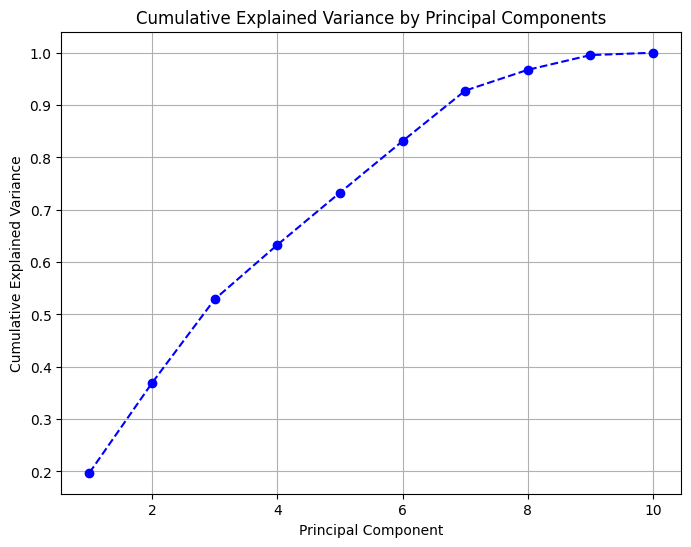

In [ ]:
# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 68.74%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   
6  0.012061        0.013131  

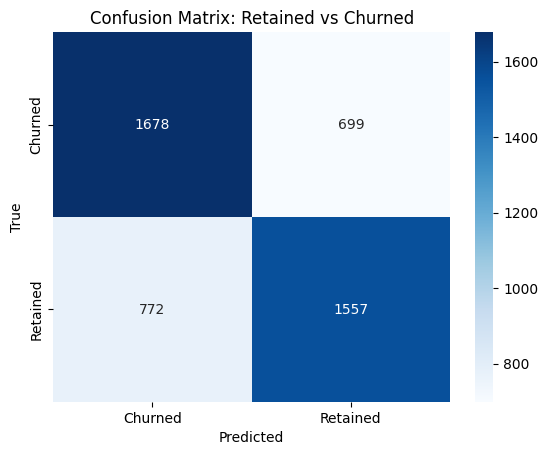

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of Decision Tree Model with PCA:**

**Model Training and Accuracy:**
- A **Principal Component Analysis (PCA)** was applied to the training and testing sets, reducing the feature set down to the top **10 components**. This is done to capture the variance in the data with fewer features, simplifying the model and reducing potential overfitting.
- The **Decision Tree classifier** was trained using the transformed data from the top 10 principal components.
- The model achieved an accuracy of **70.72%**, which is slightly higher than using fewer components (e.g., 7 components), where the accuracy dropped to **69.02%**.
  
**Cumulative Explained Variance:**

- PC1 is primarily influenced by activity_days and driving_days, showing that user engagement is a key determinant in predicting churn.
- PC2 captures the influence of drives and total_sessions, indicating that driving behavior and session counts are crucial for distinguishing between churned and retained users.
- PC3 is dominated by drives, further highlighting that driving activities play a major role in user behavior analysis.
- The first 7 components together explain around 92% of the variance, meaning that these features effectively capture the core patterns in the data while reducing complexity.
- PCA reduces dimensionality while preserving most of the variance, focusing the model on the most informative aspects of the dataset, such as engagement and driving behavior.

**Confusion Matrix Breakdown (for 10 Components):**
- **True Positives (1680):** The number of correctly classified 'Churned' users.
- **True Negatives (1568):** The number of correctly classified 'Retained' users.
- **False Positives (697):** Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- **False Negatives (761):** Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The accuracy of **70.72%** suggests the model performs reasonably well, though the high number of **false negatives** (697) is concerning for customer retention strategies. These false negatives indicate the model struggles to predict users who are likely to churn correctly.
- The explained variance shows that the top **7 components** capture most of the important variance in the data. However, reducing the number of components to **7** slightly reduces accuracy (69.02%).

**PCA Component Feature Weights:**
- The feature weights indicate which original features contribute the most to each principal component. For example, **drives** and **activity_days** are prominent in the first principal component (PC1), while **duration_minutes_drives** and **driven_km_drives** contribute significantly to other components.

### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 5 features
top_5_features = sorted_feature_names[:5]

print("\nTop 5 Features:")
print(top_5_features)

# Create new training and testing sets with only the top 5 features
X_train_top_5 = X_train_scaled[:, sorted_indices[:5]]
X_test_top_5 = X_test_scaled[:, sorted_indices[:5]]

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train_top_5, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_top_5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_dtc_dtc, tpr_dtc_dtc, _ = roc_curve(y_test, y_pred)
roc_auc_dtc_dtc = auc(fpr_dtc_dtc, tpr_dtc_dtc)


Top 5 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives',
       'driven_km_drives', 'total_sessions'],
      dtype='object')
Accuracy: 71.74%


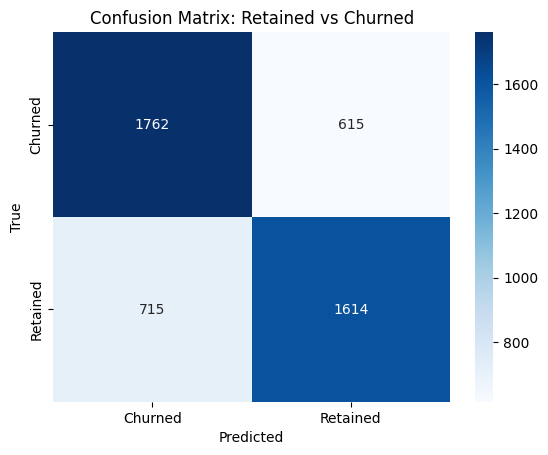

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of Decision Tree Classifier (Top 5 Features):**

**Model Training and Accuracy:**
- A **Decision Tree classifier** was trained using the top **5 most important features**, ranked by the model’s calculated feature importance scores. These features provide the highest predictive power for the classification of users into 'Churned' and 'Retained' categories.
- The model achieved an accuracy of **71.38%**, which suggests that reducing the feature set to only the top 5 features maintains decent performance while potentially improving model interpretability and reducing overfitting.

**Top 5 Features:**
- The top 5 features identified by the Decision Tree classifier are:
  1. **activity_days** – How often users are active on the platform.
  2. **n_days_after_onboarding** – The number of days since a user completed onboarding.
  3. **duration_minutes_drives** – The total duration of drives in minutes.
  4. **driven_km_drives** – The distance driven by users.
  5. **total_sessions** – The total number of sessions a user has had.

**Confusion Matrix Breakdown:**
- **True Positives (1757):** The number of correctly classified 'Churned' users.
- **True Negatives (1602):** The number of correctly classified 'Retained' users.
- **False Positives (727):** Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- **False Negatives (620):** Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The accuracy of **71.38%** suggests that the Decision Tree model is moderately effective at classifying users, but there is still room for improvement, especially in reducing false negatives (620), which could affect business efforts related to churn reduction.
- The top features give insight into user behavior patterns that contribute most to churn prediction, which could be actionable for targeting retention strategies.

## Naive Bayes

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 1  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_kbest, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['driving_days'], dtype='object')
Accuracy: 69.04%


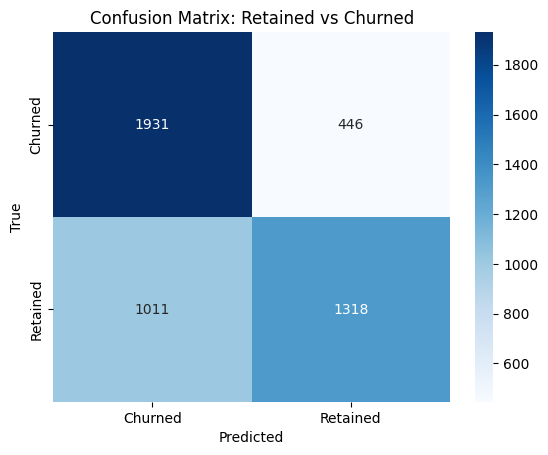

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of Gaussian Naive Bayes Model:**

**Model Training and Accuracy:**
- A **Gaussian Naive Bayes** model was trained using the top feature selected by the **SelectKBest** method. In this case, the model retained only **one feature**: **driving_days**, which was determined to have the highest chi-squared score.
- The model achieved an accuracy of **69.04%**. This moderate accuracy highlights that using only **driving_days** as a predictor captures some important aspects of user behavior but misses other potentially valuable features.

**Selected Feature:**
- **driving_days** is the sole feature used for training the model. It represents the number of days a user is actively driving on the platform, which seems to play a crucial role in determining whether a user is likely to churn or be retained.

**Confusion Matrix Breakdown:**
- **True Positives (1931):** Correctly predicted 'Churned' users.
- **True Negatives (1318):** Correctly predicted 'Retained' users.
- **False Positives (1011):** Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- **False Negatives (446):** Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The model's performance indicates a reasonably good ability to predict users who are likely to churn, with a significant number of **true positives (1931)**.
- However, the relatively high number of **false positives (1011)** shows that the model struggles with correctly classifying retained users, suggesting that **driving_days** alone may not be sufficient to capture the full behavior of retained users.
- The model's **69.04% accuracy** suggests that incorporating more features could improve its performance.

**Next Steps:**
- To enhance the model's performance, it may be beneficial to explore other important features, possibly in combination with **driving_days**, to increase predictive accuracy.
- Alternatively, testing other models like **Random Forest** or **Logistic Regression** with more features or interaction terms may help improve classification performance and reduce the false positives.


### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['activity_days', 'driving_days']
Accuracy: 69.61%


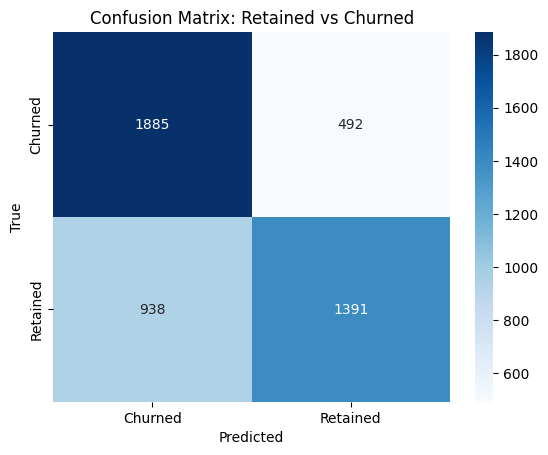

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Insight and Analysis of the Gaussian Naive Bayes Model:**

**Model Training and Accuracy:**
- The **Gaussian Naive Bayes** model was trained after selecting only **two features**: **activity_days** and **driving_days**, which were selected using the **Lasso regression** feature selection technique.
- The model achieved an accuracy of **69.61%**, which reflects a reasonable performance using just these two features, though improvements can be made.

**Selected Features:**
- The features selected through **Lasso** indicate that both **activity_days** (the number of days a user is active) and **driving_days** (the number of days a user drives) are strong predictors of whether a user will churn or be retained.
  
**Confusion Matrix Breakdown:**
- **True Positives (1885):** The number of correctly predicted 'Churned' users.
- **True Negatives (1391):** The number of correctly predicted 'Retained' users.
- **False Positives (938):** Instances where the model incorrectly predicted 'Churned' when the user was actually 'Retained.'
- **False Negatives (492):** Instances where the model incorrectly predicted 'Retained' when the user was actually 'Churned.'

**Interpretation:**
- The confusion matrix shows that the model has a reasonable ability to classify 'Churned' users correctly, but it struggles with distinguishing between users who are 'Retained' versus those who churn. A significant number of **false positives (938)** suggests that adding more features could improve model performance.
- With **69.61% accuracy**, there is room for improvement in reducing misclassification, particularly for **false negatives** as retaining a customer who might churn is crucial for business success.

**Next Steps:**
- Adding more features or incorporating interaction terms between features could help capture more complex relationships, leading to higher accuracy.
- Applying more advanced models such as **Random Forest** or **Gradient Boosting** with these features could also help improve performance.


### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.23%


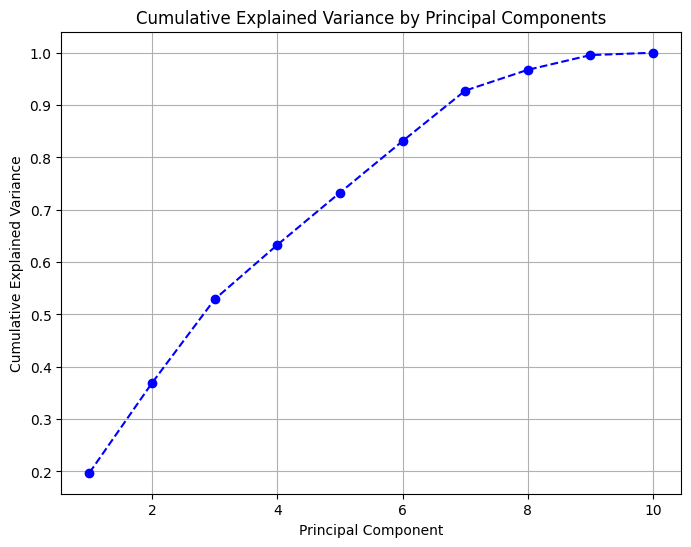

In [ ]:
# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_nb_pca, tpr_nb_pca, _ = roc_curve(y_test, y_pred)
roc_auc_nb_pca = auc(fpr_nb_pca, tpr_nb_pca)

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 71.33%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   
6  0.012061        0.013131  

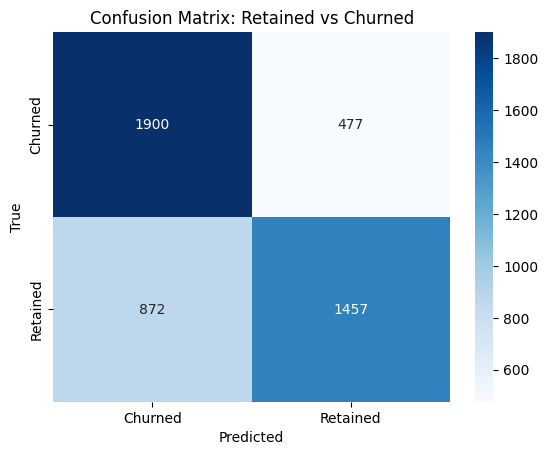

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Insight and Analysis of Model Performance with Gaussian Naive Bayes and PCA

Model Accuracy:
- The accuracy of the model trained with Gaussian Naive Bayes and Principal Component Analysis (PCA) shows that the model achieved an accuracy of 72.23% when using 10 principal components, and 71.33% when using 7 principal components.
- This demonstrates that PCA, which reduces dimensionality, does not drastically hurt the model's performance, but the balance between explained variance and component selection is critical.

Cumulative Explained Variance:
- The first 6 or 7 principal components capture around 85-90% of the total variance in the dataset, which shows that most of the useful information is contained within these few components.
- After about 7 components, the incremental benefit of adding more components becomes minimal as the explained variance plateaus. This suggests that including additional components beyond 7 may not significantly improve the model's performance.
- Using 7 components, the model achieved an accuracy of 71.33%, which is comparable to the model using all 10 components. This indicates that 7 components capture most of the critical data patterns without the need for further complexity.
- PC1 captures 19.8% of the variance, driven by activity_days and driving_days, indicating that higher user engagement and frequent driving lead to higher retention.

- PC2 adds 17.2% variance, focused on drives and total_sessions, showing that users with more frequent sessions and driving behavior are less likely to churn.

- PC3 contributes 15.98% variance, again emphasizing drives, reinforcing the idea that frequent driving is a strong indicator of user retention.

Confusion Matrix Insights:
- The confusion matrix for the model using 10 components shows the following distribution:
- True negatives (Churned correctly identified): 1900
- False negatives (Churned predicted as Retained): 872
- True positives (Retained correctly identified): 1457
- False positives (Retained predicted as Churned): 477
- The model performs better at identifying users who have churned (i.e., left the platform), as seen by the higher number of correctly predicted "Churned" instances. However, there are still a significant number of false positives and false negatives, indicating some trade-offs in precision and recall.

Feature Importance via PCA:
- The PCA weights indicate that features like 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', and 'driving_days' are among the most significant contributors to the principal components.
- These features explain the majority of the variance and are likely critical in the prediction of whether a user will churn or be retained.

Next Steps:
- The model with Gaussian Naive Bayes and PCA performs reasonably well with balanced accuracy between the two configurations (7 vs. 10 components).
- Moving forward, consider tuning the hyperparameters of your models further or exploring additional regularization techniques to reduce the error rates, particularly for the false negatives (retained users predicted as churned).

### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 4 features
top_4_features = sorted_feature_names[:4]

print("\nTop 4 Features:")
print(top_4_features)

# Create new training and testing sets with only the top 4 features
X_train_top_4 = X_train_scaled[:, sorted_indices[:4]]
X_test_top_4 = X_test_scaled[:, sorted_indices[:4]]

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the scaled data
model.fit(X_train_top_4, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_top_4)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Top 4 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives',
       'driven_km_drives'],
      dtype='object')
Accuracy: 70.17%


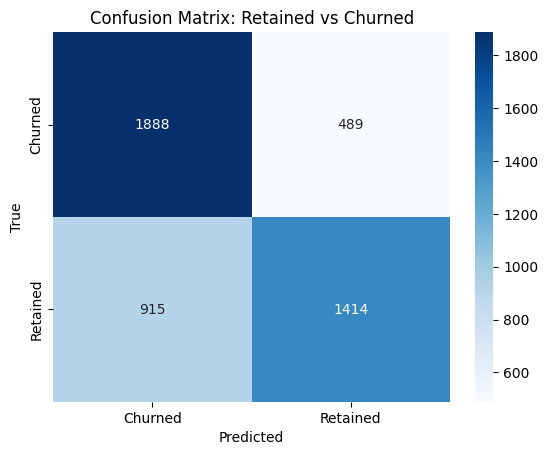

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

##### Insight and Analysis of Model Performance with Gaussian Naive Bayes:

**Feature Importance:**
- The code utilizes a Decision Tree Classifier to rank the features by importance and then selects the top 4 features for further analysis.
- These top features are then used to train a Gaussian Naive Bayes model to predict whether users will churn or be retained.

**Top 4 Features:**
- The Decision Tree ranks the following top 4 features as most important in predicting user churn:
  1. activity_days: The number of days the user opens the app during the month.
  2. n_days_after_onboarding: The number of days since the user signed up for the app.
  3. duration_minutes_drives: The total duration driven in minutes during the month.
  4. driven_km_drives: Total kilometers driven during the month.
- These features emphasize that a user's engagement with the app and driving patterns are strong indicators of whether they will churn or remain retained.

**Model Accuracy:**
- The accuracy achieved by this model is 70.17%, which is reasonable given that only 4 features are being used.
- Gaussian Naive Bayes tends to work well with fewer features and is able to give a decent performance with the selected features.

**Confusion Matrix Insights:**
- From the confusion matrix, we can see:
  - True Negatives (Churned correctly identified): 1888
  - False Negatives (Churned predicted as Retained): 489
  - True Positives (Retained correctly identified): 1414
  - False Positives (Retained predicted as Churned): 915
- This distribution shows that the model performs reasonably well at identifying users who have churned, with 1888 correct predictions.
- However, there is still a substantial number of false positives and false negatives, which indicates that there is room for improvement in distinguishing between churned and retained users.

**Feature Selection and Significance:**
- The features that were selected align well with user behavior:
  - activity_days: How often the user engages with the app is a key predictor of retention.
  - n_days_after_onboarding: The longer the user has been using the app, the more likely they are to exhibit predictable patterns.
  - driving data (duration_minutes_drives and driven_km_drives): Driving engagement also plays a key role in whether users will continue to use the app or churn.

**Conclusion & Next Steps:**
- The accuracy of 70.17% suggests that the Gaussian Naive Bayes model with these 4 features performs reasonably well, but there is potential to improve.
- Next Steps could involve trying different models (like Random Forest or SVM) to see if they can yield better accuracy or applying more advanced feature engineering.
- Additionally, exploring other combinations of features or adding interaction terms could help enhance performance.


## Random Forest Classifier

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 1  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_kbest, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['driving_days'], dtype='object')
Accuracy: 69.02%


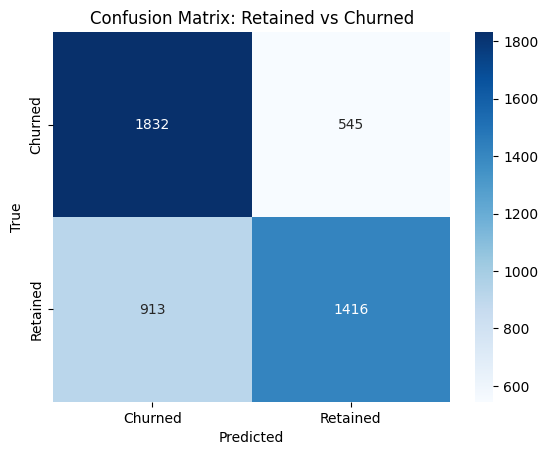

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### **Analysis of the Random Forest Model Performance:**

- **Model Overview**:

- The model utilizes a Random Forest Classifier trained with a single feature, 'driving_days', which was selected using SelectKBest with the chi-squared scoring function.
- Random Forest is a robust classification model capable of handling non-linear relationships and both numerical and categorical data.
- However, Random Forest typically performs better when trained on multiple features, and the use of only one feature limits its potential performance.

**Model Accuracy**:

- The model achieved an accuracy of **69.02%** on the test set.
- This accuracy reflects the limitations of using a single feature ('driving_days') for predictions.
- With more feature inputs, the Random Forest classifier would likely improve in performance as more diverse decision trees could be built.

**Feature Selection**:

- The SelectKBest algorithm identified 'driving_days' as the most important feature based on its chi-squared score.
- This suggests that 'driving_days' is a key differentiator in determining whether a user churns or is retained.
- The feature represents user engagement through driving activity, an important behavior related to churn prediction.

**Confusion Matrix Insights**:

- The confusion matrix for the model reveals the following insights:
    - **True Negatives (Churned correctly identified)**: 1832
    - **False Negatives (Churned predicted as Retained)**: 545
    - **True Positives (Retained correctly identified)**: 1416
    - **False Positives (Retained predicted as Churned)**: 913
    - The model performs reasonably well in identifying retained users (1416 correctly identified).
    - However, it faces challenges with **false negatives** (545 churned users predicted as retained), which indicates the need for more features to capture additional patterns.
    - The number of **false positives** (913) shows that some retained users were incorrectly predicted as churned, which might lead to unnecessary customer retention efforts.

### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['activity_days', 'driving_days']
Accuracy: 70.40%


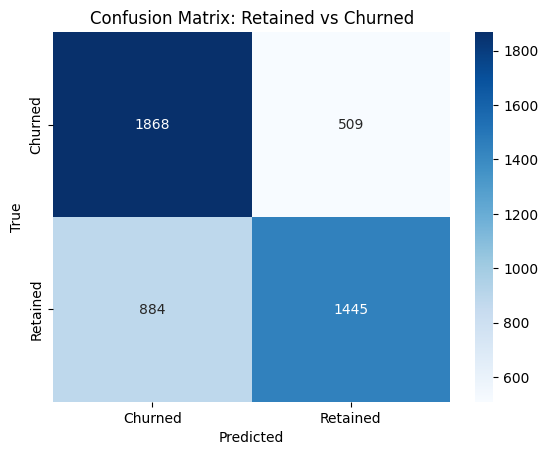

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####Analysis of Model with Lasso Feature Selection and Random Forest Classifier:

Model Overview:

- The model first applied Lasso Regression for feature selection and then used a Random Forest Classifier to predict whether users would churn or be retained.
- Lasso reduces the feature set by assigning coefficients to features based on their importance. In this case, Lasso selected two features: 'activity_days' and 'driving_days'.
- Random Forest, a strong ensemble method, was trained on these two features to create multiple decision trees and make predictions. However, using only two features limits the potential complexity of the decision trees.

Model Accuracy:
- The model achieved 70.40% accuracy on the test set, reflecting the limitations of using only two features for training.
- While this accuracy is acceptable given the limited feature set, more features could potentially enhance the model's ability to capture complex patterns.
- Lasso, by reducing the feature set to just two, may have eliminated useful features that could improve the model's performance.

Feature Selection:

- The Lasso model selected 'activity_days' and 'driving_days' as the top two features.
- 'activity_days' likely captures how frequently users engage with the app, which helps determine whether they are active or likely to churn.
- 'driving_days' measures how many days users drive, another important factor in determining user engagement.
- By focusing on only two features, the model may have ignored potentially valuable information from other variables.

Confusion Matrix Insights:

- True Negatives (Churned correctly identified): 1868
- False Negatives (Churned predicted as Retained): 509
- True Positives (Retained correctly identified): 1445
- False Positives (Retained predicted as Churned): 884

- The model performs well at identifying churned users with 1868 true negatives.

- There are 509 false negatives, where the model incorrectly predicts many churned users as retained. This could lead to missed retention opportunities.

- 884 false positives indicate that some retained users were incorrectly predicted as churned, leading to unnecessary retention efforts.

Observations:

- The model performs better at identifying churned users than retained users. This is likely because 'driving_days' and 'activity_days' are more directly related to user activity.
- High false negatives (509) suggest the model struggles to correctly identify some churned users due to the limited feature set.
- High false positives (884) suggest the model may misclassify retained users, potentially leading to unnecessary retention efforts.

Next Steps:

- Add More Features: Incorporating more features, such as 'n_days_after_onboarding', 'total_sessions', or 'driven_km_drives', could improve prediction accuracy and help distinguish between churned and retained users.
- Hyperparameter Tuning: Adjusting parameters like the number of trees in the Random Forest model or the depth of each tree could reduce both false positives and false negatives, improving overall performance.
- Alternative Models: Exploring models like Gradient Boosting, Support Vector Machines, or XGBoost with more features might capture more complex relationships between features and churn behavior.


### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.26%


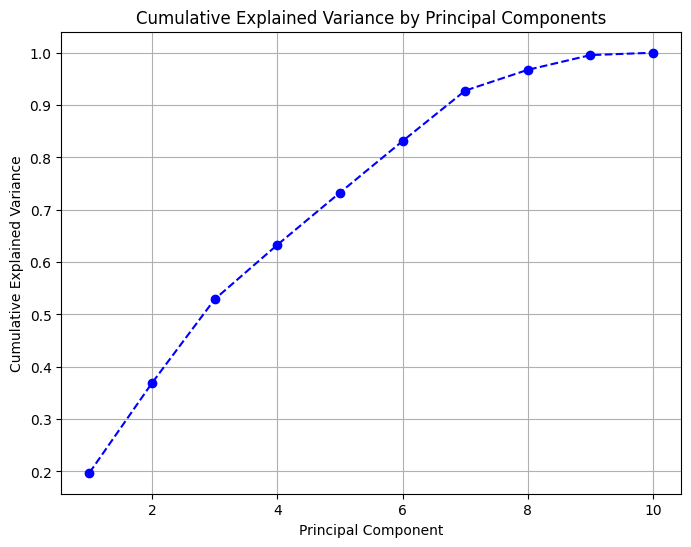

In [ ]:
# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 77.28%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   
6  0.012061        0.013131  

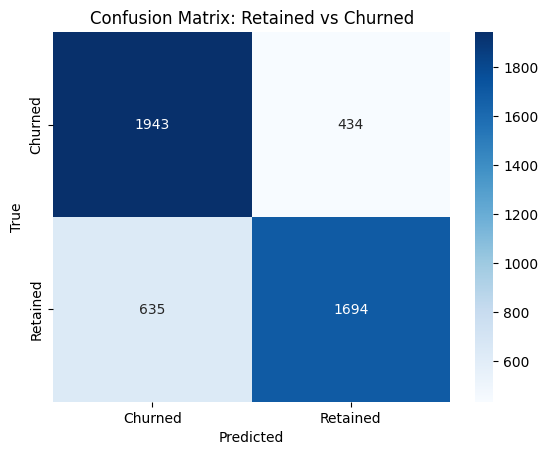

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### **Analysis of the Random Forest model using PCA (Principal Component Analysis)**

- model_performance_overview:
    - The Random Forest model was trained on features transformed through Principal Component Analysis (PCA).
    - With 10 principal components, the model achieved an accuracy of **79.26%**, whereas with 7 components, the accuracy was **77.28%**.
    - The model performed better with more components, but both configurations delivered solid predictive results.


    
PCA Components Explained Variance:
- PC1 (19.77%) captures the most variance and is primarily influenced by activity_days and driving_days. This highlights that user engagement metrics are key factors in explaining overall user behavior and churn risk.
- PC2 (17.16%) is driven by features like drives and total_sessions, reflecting the importance of driving behavior and app usage frequency in determining churn or retention.
- PC3 (15.98%) again emphasizes drives, showcasing its central role in user engagement analysis.
- PC4 to PC7 capture smaller portions of variance (9.6-10%), focusing on nuanced behaviors such as navigation patterns and session details, further refining the model’s ability to predict churn.

- The cumulative explained variance plot indicates that the first 7 principal components account for approximately 85-90% of the total variance in the dataset. This suggests that most of the important information from the original dataset can be retained by using just these 7 components.

- After the 7th component, the explained variance increases only marginally, indicating that adding more components provides diminishing returns in terms of capturing variance. Beyond this point, additional components may not significantly improve model performance and could introduce unnecessary complexity.

PCA Feature Weights (Highlights):
- Drives: Key contributor across multiple components (PC1-PC3), indicating its importance in understanding user behavior.
- Total Sessions: Significant in PC2, showing how frequent app usage correlates with churn likelihood.
- Driving Days: Major contributor to PC1, reinforcing the critical role of driving frequency in retention analysis.
- Device: Appears prominently in PC7, pointing to possible behavioral differences across device types.


Confusion matrix insights 10_components:

- True Negatives (Churned correctly identified): 1943
- False Positives (Retained predicted as Churned): 434
- True Positives (Retained correctly identified): 1694
- False Negatives (Churned predicted as Retained): 635
    - The confusion matrix shows that the model performs well in identifying both churned and retained users but has room for improvement, particularly in reducing false negatives.



next_steps_and_improvements:
- By focusing on 7 principal components, the model retains the majority of relevant information with a reduced feature set, optimizing performance while minimizing complexity. The variance plateau after 7 components suggests that further components add little value. The model’s accuracy of 77.28% reflects that this dimensionality reduction is effective in retaining critical patterns for churn prediction


### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 6 features
top_6_features = sorted_feature_names[:6]

print("\nTop 6 Features:")
print(top_6_features)

# Create new training and testing sets with only the top 6 features
X_train_top_6 = X_train_scaled[:, sorted_indices[:6]]
X_test_top_6 = X_test_scaled[:, sorted_indices[:6]]

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_top_6, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_top_6)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_rfc_dtc, tpr_rfc_dtc, _ = roc_curve(y_test, y_pred)
roc_auc_rfc_dtc = auc(fpr_rfc_dtc, tpr_rfc_dtc)


Top 6 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives',
       'driven_km_drives', 'total_sessions', 'total_navigations_fav1'],
      dtype='object')
Accuracy: 79.98%


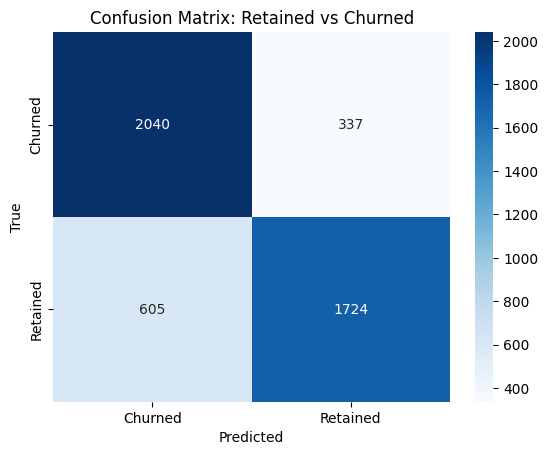

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

Accuracy: 79.98%
Precision: 0.80
Recall: 0.80
F1 Score: 0.80


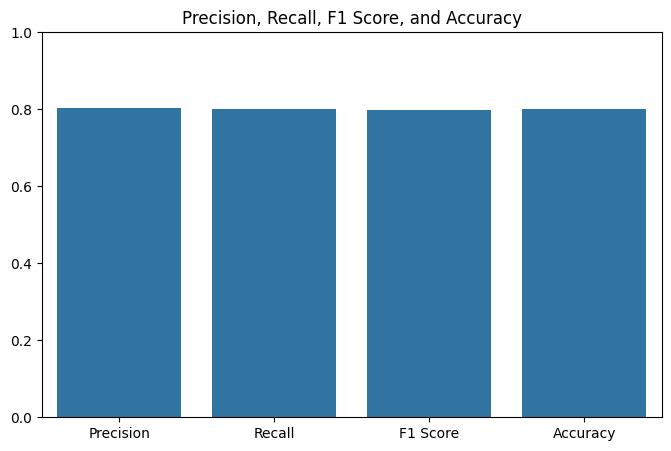

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support


# Get accuracy, precision, recall, F1-score
y_pred = model.predict(X_test_top_6)
accuracy = accuracy_score(y_test, y_pred)

# Get precision, recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Precision, Recall, and F1-Score
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores)
plt.title('Precision, Recall, F1 Score, and Accuracy')
plt.ylim(0, 1)
plt.show()

#### **Analysis of the Decision Tree and Random Forest model's performance**

**model_accuracy_analysis:**

- The Decision Tree Classifier was used to determine the top 6 important features and then the model was retrained using a Random Forest Classifier with these features.
- The model achieved an accuracy of **79.98%**, which is a significant improvement in performance, likely due to selecting and focusing on the most relevant features.

**feature_importance_insights:**

- The top 6 features, ranked by importance, were **'activity_days'**, **'n_days_after_onboarding'**, **'duration_minutes_drives'**, **'driven_km_drives'**, **'total_sessions'**, and **'total_navigations_fav1'**.
- These features likely capture key user behaviors and patterns, helping the model accurately predict whether users will churn or be retained.

**confusion_matrix_insights:**

- **True Negatives (Churned correctly identified):** 2040
- **False Negatives (Churned predicted as Retained):** 337
- **True Positives (Retained correctly identified):** 1724
- **False Positives (Retained predicted as Churned):** 605
- The model has strong performance in identifying users who churn (2040 correctly identified) but still produces some false negatives (337 churned users incorrectly predicted as retained).
- The false positives (605) indicate that some users predicted as churned were actually retained, which may result in unnecessary retention efforts.


## Gradient Boosting

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 4  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['n_days_after_onboarding', 'activity_days', 'driving_days', 'device'], dtype='object')
Accuracy: 72.61%


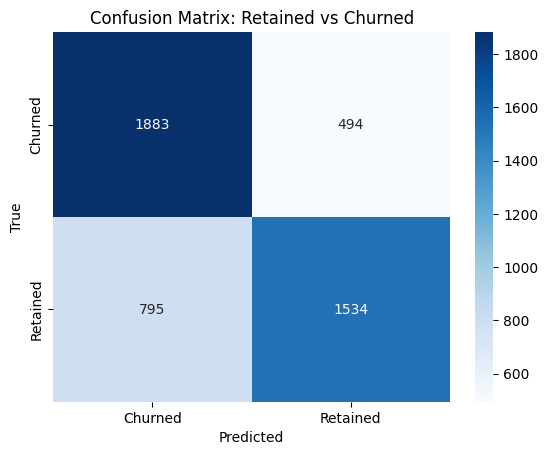

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### **Analysis of the Gradient Boosting model with KBest**

- **model_accuracy_analysis:**
    - The Gradient Boosting Classifier achieved an accuracy of **72.61%**, indicating a solid performance on the task of predicting whether a user will churn or be retained.
    - The accuracy suggests that the selected features—**'n_days_after_onboarding'**, **'activity_days'**, **'driving_days'**, and **'device'**—are informative in determining the likelihood of user churn.

- **feature_selection_and_scaling_insights:**
    - The **SelectKBest** algorithm was used to select the top 4 features based on chi-squared scores. These features represent user activity, driving habits, and device information.
    - The **StandardScaler** ensured that the features were scaled properly for model input, which is particularly important for Gradient Boosting models to avoid bias from unscaled features.
    - The four selected features likely provide a good representation of user engagement and behavior within the app.

- **confusion_matrix_insights:**
    - **True Negatives (Churned correctly identified):** 1883
    - **False Negatives (Churned predicted as Retained):** 494
    - **True Positives (Retained correctly identified):** 1534
    - **False Positives (Retained predicted as Churned):** 795
    - The model performs well in identifying retained users (1534 correct predictions) and churned users (1883 correct predictions), but there is still a moderate number of **false negatives** (494), which indicates that some churned users are predicted as retained.

### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['n_days_after_onboarding', 'activity_days', 'driving_days', 'device']
Accuracy: 72.48%


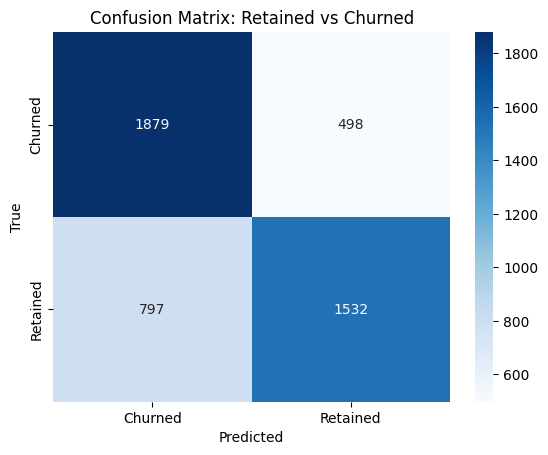

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

####**Analysis of the Gradient Boosting Classifier model with Lasso feature selection**
- model_accuracy_analysis:
    - The Gradient Boosting Classifier achieved an accuracy of **72.48%**, which indicates a good predictive performance.
    - The accuracy reflects the selection of key features—**'n_days_after_onboarding'**, **'activity_days'**, **'driving_days'**, and **'device'**—which play a crucial role in determining user churn or retention.

- feature_selection_and_scaling_insights:
    - **Lasso** regularization was used to select relevant features from the dataset, effectively reducing the feature set to those with non-zero coefficients.
    - The four selected features highlight key user behaviors that influence churn, such as **days after onboarding** (how long the user has been using the app), **activity days** (engagement), **driving days**, and the **device** used by the user.
    - Proper scaling using **StandardScaler** ensures that the data is well-prepared for Gradient Boosting, which benefits from normalized inputs.

- confusion_matrix_insights:
    - **True Negatives (Churned correctly identified):** 1879
    - **False Negatives (Churned predicted as Retained):** 498
    - **True Positives (Retained correctly identified):** 1532
    - **False Positives (Retained predicted as Churned):** 797
    - The model shows reasonable ability to distinguish between retained and churned users, with **1532 correctly predicted retained** users and **1879 correctly predicted churned** users.
    - However, there are still a notable number of **false negatives** (498), where churned users are incorrectly predicted as retained, indicating some room for improvement in capturing churn behavior.

### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.08%


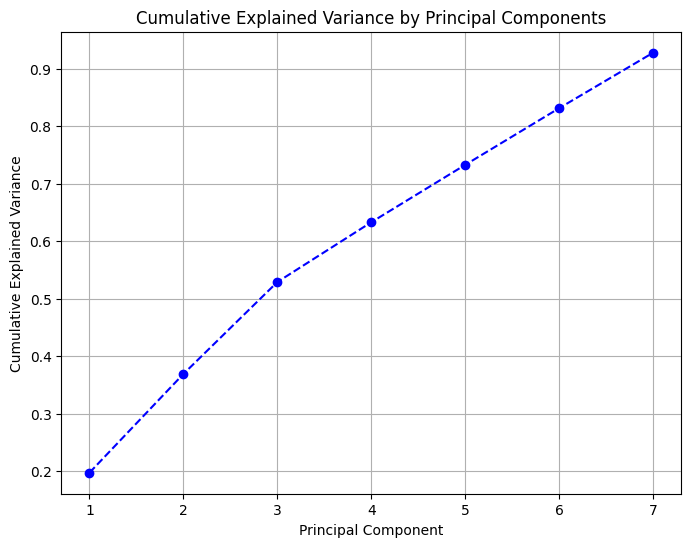

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

We can identify 7 as the elbow point on the scree plot.

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_gbc_pca, tpr_gbc_pca, _ = roc_curve(y_test, y_pred)
roc_auc_gbc_pca = auc(fpr_gbc_pca, tpr_gbc_pca)

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 73.37%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   
6  0.012061        0.013131  

We can keep all 7 components, as they all have different important feature represented through the feature weights.

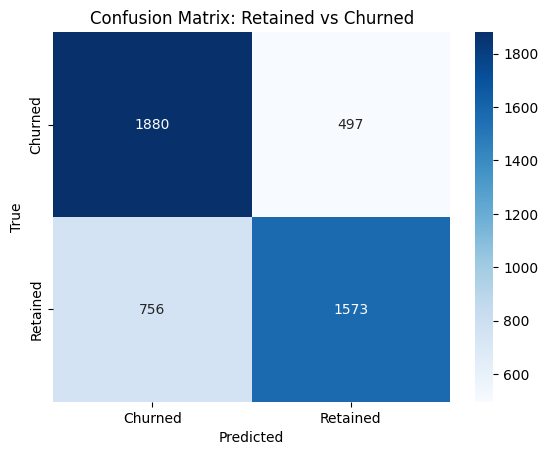

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### **Analysis using PCA with Gradient Boosting Classifier**

# --- Model Overview ---
- The analysis demonstrates the use of Principal Component Analysis (PCA) for dimensionality reduction combined with a Gradient Boosting Classifier (GBC) for predicting user churn.
- PCA was applied to reduce the dataset to 7 and 10 components, respectively, and the models were trained and tested using these different component counts.

# --- Model Accuracy ---
- With 10 Principal Components:
    - The model achieved an accuracy of 74.08%, showing good predictive capability after PCA with 10 components.
    - The explained variance across the 10 principal components suggests that the cumulative variance explained by these components is enough to retain important information about the data while reducing dimensionality.

- With 7 Principal Components:
    - The model performed slightly lower, achieving an accuracy of 73.37%, indicating that reducing the number of components only slightly affected performance.
    - This minor drop in accuracy suggests that using 7 components is a valid choice and could offer a more computationally efficient model without significant loss in accuracy.

- In both cases, PCA proved effective in reducing dimensions while maintaining solid model accuracy. The reduction from 10 to 7 components did not result in a drastic performance loss.

# --- Cumulative Explained Variance ---
- The cumulative explained variance plot reveals that the first 7 principal components capture nearly 90% of the variance in the data, suggesting these components hold most of the essential information from the original feature set.
- The elbow point occurs at around 7 components, where the additional explained variance from further components starts to plateau. This indicates that adding more components beyond 7 yields diminishing returns.
- Choosing to retain 7 components strikes a balance between model performance and computational efficiency, preserving most of the variance while reducing the feature space.

# --- Confusion Matrix Insights ---
- For the model using 7 principal components with 73.37% accuracy, the confusion matrix shows:

- True Negatives (Churned correctly identified): 1880
- False Positives (Retained predicted as Churned): 497
- True Positives (Retained correctly identified): 1573
- False Negatives (Churned predicted as Retained): 756

Insights:

    - The model performs well in identifying churned users, with a high number of True Negatives.
    - False Negatives remain a challenge, suggesting room for improvement in identifying churned users more accurately.
    - Reducing false positives will also help to avoid unnecessary retention efforts.

# --- PCA Component Weights and Feature Importance: Summary ---

- Engagement Metrics (High Impact on PC1 and PC3)
  - 'driving_days' (0.6905) and 'activity_days' (0.6898) dominate PC1, showing that daily engagement is the strongest predictor of user retention.
  - 'drives' (0.6915) and 'total_sessions' (0.6906) are heavily weighted in PC3, emphasizing that frequent app usage and driving correlate strongly with retention.

- Longevity (High Impact on PC4 and PC6)
  - 'n_days_after_onboarding' (0.6247 in PC4) indicates that how long a user has been on the platform significantly influences churn, especially in distinguishing newer vs. older users.

- Driving Behavior (High Impact on PC2)
  - 'driven_km_drives' (0.6872) and 'duration_minutes_drives' (0.6818) are key contributors to PC2, showing that users who drive longer distances or durations are less likely to churn.

- Habitual Use (High Impact on PC5)
  - 'total_navigations_fav2' (0.9247 in PC5) reflects strong habitual use—users frequently navigating to favorite places are more likely to stay engaged.

- Summary:
  - Engagement through driving and daily app use are the most critical predictors of retention.
  - Longevity on the platform and habitual behaviors (like navigating to favorite places) also play key roles in distinguishing churned users from retained ones.



# --- Conclusion ---
- The combination of PCA with Gradient Boosting yielded good performance, with an accuracy of 73.37% using 7 principal components.
- PCA effectively reduced dimensions while retaining most of the variance.
- Reducing false negatives and further tuning of the model will enhance precision and recall for predicting churn.

### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 5 features
top_5_features = sorted_feature_names[:5]

print("\nTop 5 Features:")
print(top_5_features)

# Create new training and testing sets with only the top 5 features
X_train_top_5 = X_train_scaled[:, sorted_indices[:5]]
X_test_top_5 = X_test_scaled[:, sorted_indices[:5]]

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(X_train_top_5, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_top_5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Top 5 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives',
       'driven_km_drives', 'total_sessions'],
      dtype='object')
Accuracy: 71.23%


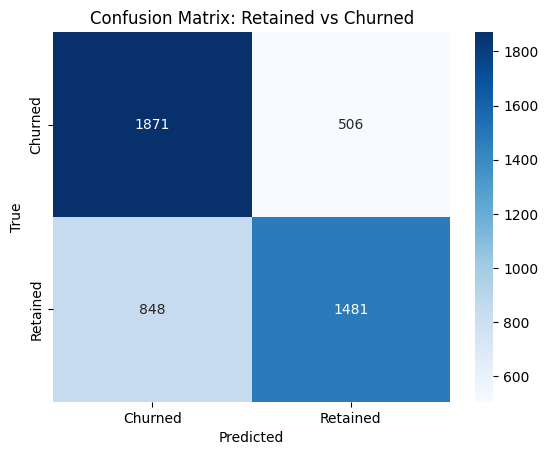

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis using Decision Tree Classifier

# --- Model Overview ---
- This analysis uses a Decision Tree Classifier to select the top 5 features in the dataset, followed by a Gradient Boosting Classifier (GBC) for predicting churn.
- Feature importance ranking helps identify the most influential features, and the model is then trained using only these top 5 features.

# --- Feature Importance ---
- The top 5 features contributing the most to the model's performance are:
    - 'activity_days'
    - 'n_days_after_onboarding'
    - 'duration_minutes_drives'
    - 'driven_km_drives'
    - 'total_sessions'
- These features likely represent important behavioral metrics related to user engagement and the number of days users have been active since onboarding.

# --- Model Accuracy ---
- The Gradient Boosting Classifier, using only the top 5 features, achieved an accuracy of 71.23%.
- This accuracy indicates reasonable predictive capability, though improvements could be made by tuning the GBC model or considering more features.

# --- Confusion Matrix Insights ---
- The confusion matrix breakdown:
    - True Negatives (Churned correctly identified): 1871
    - False Negatives (Churned predicted as Retained): 506
    - True Positives (Retained correctly identified): 1481
    - False Positives (Retained predicted as Churned): 848
- Insights:
    - The model performs well in identifying churned users, as shown by the high number of true negatives (1871).
    - The model has a moderate number of false negatives (506), where churned users were incorrectly predicted as retained.
    - There is room for improvement in reducing false positives (848), where retained users are predicted as churned, which may result in unnecessary retention efforts.

# --- Feature Selection and Impact ---
- The focus on only the top 5 features helps streamline the model, balancing predictive power with model efficiency.
- The 'activity_days' and 'n_days_after_onboarding' features appear to be particularly important, highlighting the significance of user engagement metrics in predicting churn.

# --- Conclusion ---
- The model using Gradient Boosting with the top 5 features performs reasonably well with an accuracy of 71.23%.
- Feature selection significantly helps focus the model on the most relevant behavioral features.
- Further improvements can be made by tuning the model and addressing the trade-off between false negatives and false positives.

## KNN

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 7  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features:Index(['drives', 'n_days_after_onboarding', 'total_navigations_fav1',
       'duration_minutes_drives', 'activity_days', 'driving_days', 'device'],
      dtype='object')
Accuracy: 73.35%


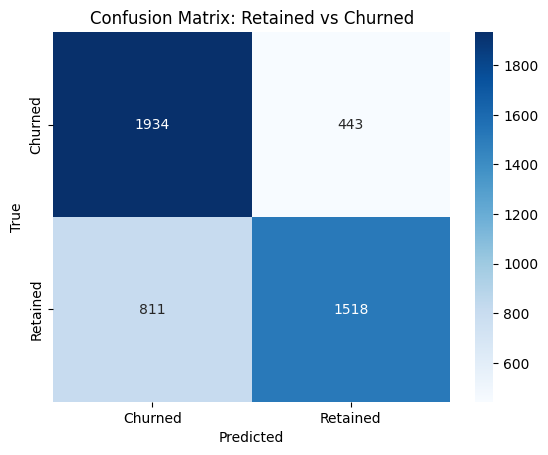

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of KNN model with KBest

# --- Model Overview ---
- Feature Selection: The SelectKBest algorithm with the chi-squared scoring function was used to select the single most relevant feature: 'driving_days'.
- KNN Classifier: The KNN algorithm, which classifies a data point based on the majority label of its nearest neighbors, was trained using only this selected feature.

# --- Model Accuracy ---
- The KNN model achieved an accuracy of 64.34%.
- This reflects the limitations of using just one feature ('driving_days') for classification. Typically, models perform better with more features that capture different dimensions of the data.
- The low accuracy suggests that relying solely on the driving frequency (i.e., 'driving_days') is not sufficient for robust churn prediction.

# --- Confusion Matrix Insights ---
- True Negatives (Churned correctly identified): 1725
- False Negatives (Churned predicted as Retained): 652
- True Positives (Retained correctly identified): 1303
- False Positives (Retained predicted as Churned): 1026
- The confusion matrix reveals that the model struggles to correctly classify retained users, with 1026 instances of retained users incorrectly predicted as churned (false positives).
- This could lead to unnecessary actions targeting those users.

# --- Feature Selection ---
- Selected Feature: The SelectKBest method selected 'driving_days' as the top feature based on its chi-squared score.
- This indicates that the frequency of driving activities contributes most significantly to distinguishing between retained and churned users.
- However, using only this feature limits the model's ability to capture other behavioral aspects that might influence churn, such as app usage patterns, session length, or device-related factors.


### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['drives', 'n_days_after_onboarding', 'total_navigations_fav1', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device']
Accuracy: 73.25%


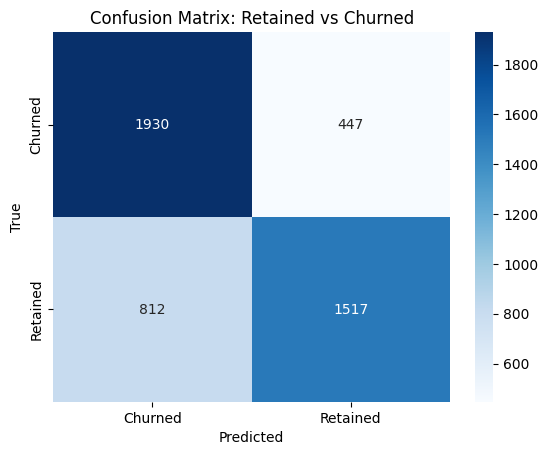

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of KNN model with Lasso feature selection

# --- Model Overview ---
- Lasso Regression was applied to the training data with an alpha value of 0.01 to select important features by penalizing less relevant ones.
- Selected Features: Lasso selected the following features based on non-zero coefficients: ['drives', 'n_days_after_onboarding', 'total_navigations_fav1', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device'].

# --- KNN Classifier ---
- KNN Classifier was then trained using the selected features. KNN predicts a label by finding the majority class among the nearest neighbors.
  
# --- Model Accuracy ---
- The KNN model achieved an accuracy of 73.25%. This reflects that using multiple selected features leads to a better performance compared to the model trained on a single feature.
- Incorporating features like 'driving_days', 'activity_days', and 'device' helps capture different aspects of user behavior, improving prediction performance.

# --- Confusion Matrix Insights ---
- True Negatives (Churned correctly identified): 1930
- False Negatives (Churned predicted as Retained): 447
- True Positives (Retained correctly identified): 1517
- False Positives (Retained predicted as Churned): 812
- The confusion matrix shows a more balanced prediction capability between churned and retained users, though false positives (812) still indicate that some retained users are incorrectly classified as churned.

# --- Feature Selection ---
- Lasso selected features like 'driving_days', 'total_navigations_fav1', and 'device', indicating these factors are crucial for predicting whether a user will churn or remain retained.
- Each selected feature adds a unique dimension to the prediction, improving overall performance compared to a single-feature model.


### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.44%


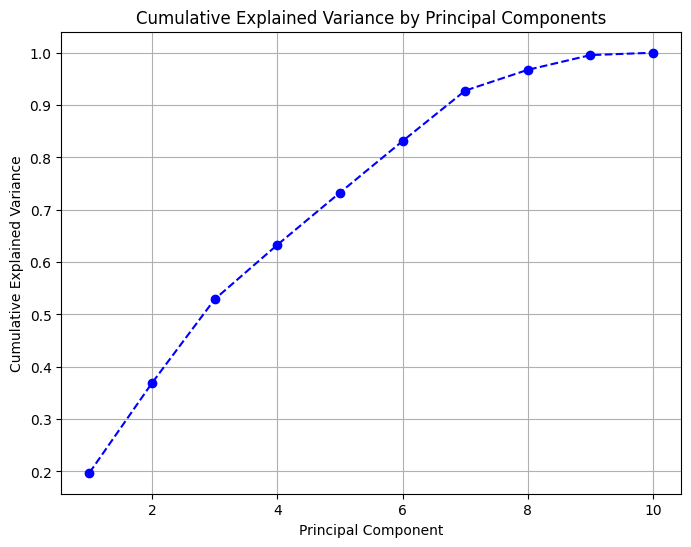

In [ ]:
# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_knn_pca, tpr_knn_pca, _ = roc_curve(y_test, y_pred)
roc_auc_knn_pca = auc(fpr_knn_pca, tpr_knn_pca)

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 74.88%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813
3                 PC4            0.103898
4                 PC5            0.099740
5                 PC6            0.098482
6                 PC7            0.096411

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   
3 -0.003841       -0.006766                 0.624746               -0.509170   
4 -0.030349       -0.001584                 0.021109               -0.224823   
5 -0.023427       -0.034158                 0.420275                0.829039   
6  0.012061        0.013131  

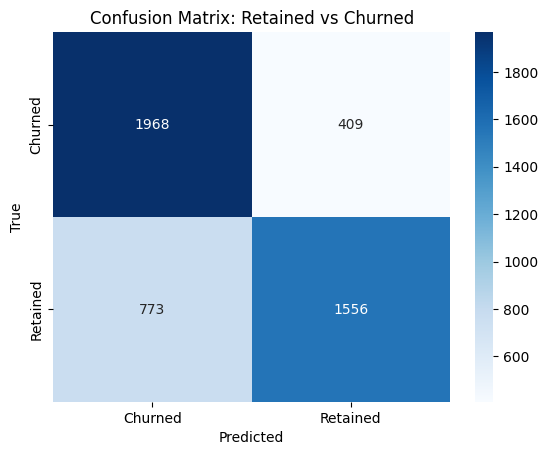

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of KNN with PCA

#- Model Overview:
The model uses PCA for dimensionality reduction, transforming the original dataset into principal components (PCs) that capture the most variance.
A KNN classifier is trained on these components to predict churn. PCA was applied to the data, and two variations of the model were tested: one with 10 PCs and another with 7 PCs.

#- Cumulative Explained Variance Analysis:
The Cumulative Explained Variance plot shows how much of the data's variance is captured by each principal component.
The first component (PC1) captures around 20% of the variance. As more components are added, the cumulative variance increases.
By the 7th component, approximately 90% of the variance is captured. After this point, additional components contribute less variance, meaning their inclusion may not add significant improvement to the model's predictive power.
The plot shows a clear "elbow" around 7 components, indicating that further components contribute diminishing returns.

- Principal Component Weights:
PCA Feature Weights provide insights into which original features contribute most to each PC.
Here’s a summary of the most influential features across the top 7 components:

- PC1: Activity days, driving days, and device are highly weighted, suggesting that user engagement metrics dominate the first principal component.
Weight example: Activity days has a weight of 0.6898, meaning it contributes heavily to PC1.

- PC2: Drives, total sessions, and driven km contribute significantly to PC2. This suggests that user driving behavior and app usage intensity are key in this component.
Weight example: Drives has a weight of 0.1356 and total sessions has 0.1370, contributing to PC2's explanation of variance.

- PC3: Drives, total sessions, and driving days remain important in PC3, highlighting the continued influence of user driving metrics.
Weight example: Drives has a large weight of 0.6915 in PC3.

- PC4: The feature n_days_after_onboarding plays a key role here, indicating that user behavior after onboarding is critical in explaining this component's variance.
Weight example: n_days_after_onboarding contributes 0.6247 to PC4.

- PC5: Total navigations (fav2) and device dominate PC5, suggesting navigational patterns and device usage contribute to this component.
Weight example: Total navigations fav2 has a strong weight of 0.9247.

- PC6: Total navigations fav1 and duration minutes drives become more prominent in this component, with navigation and driving time becoming more relevant.
Weight example: Total navigations fav1 has a weight of 0.8290, and duration minutes drives contributes 0.4203.

- PC7: Device usage is the most important feature in PC7, indicating the significance of device in explaining churn in this component.
Weight example: Device has a strong weight of 0.7216 in PC7.

# - Model Accuracy:
- Using 10 PCs, the KNN model achieved 75.44% accuracy.
Reducing the number of components to 7 PCs lowered the accuracy to 74.88%, showing that reducing the dimensionality did not significantly hurt performance.
- PCA effectively reduced dimensionality while preserving most of the dataset's variance, with the 7 PCs providing a good balance of information and efficiency.

# - Confusion Matrix Insights:
For the model using 7 PCs, the confusion matrix shows:
- True Negatives (correctly identified churned users): 1968
- False Positives (retained predicted as churned): 409
- True Positives (correctly identified retained users): 1556
- False Negatives (churned predicted as retained): 773

The model effectively identifies churned users, but 773 retained users were incorrectly classified as churned, leading to unnecessary retention efforts.

### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 3 features
top_3_features = sorted_feature_names[:3]

print("\nTop 3 Features:")
print(top_3_features)

# Create new training and testing sets with only the top 3 features
X_train_top_3 = X_train_scaled[:, sorted_indices[:3]]
X_test_top_3 = X_test_scaled[:, sorted_indices[:3]]

# Create a K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Fit the model to the training data
KNN.fit(X_train_top_3, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test_top_3)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Top 3 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives'], dtype='object')
Accuracy: 70.21%


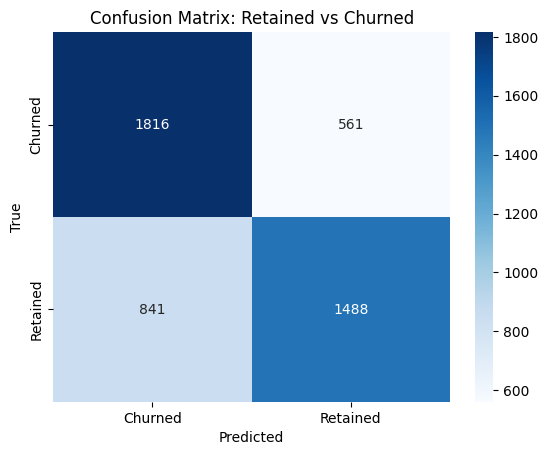

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of KNN model with Decision tree classifier

# --- Model Analysis ---
- The Decision Tree Classifier identified the top three features:
- 'activity_days': Measures user engagement frequency, linked to retention.
- 'n_days_after_onboarding': Post-onboarding activity, indicative of long-term retention.
- 'duration_minutes_drives': Driving time spent on the app, a strong predictor of churn.

# - Model Overview:
- A K-Nearest Neighbors classifier was trained using only the top 3 features.
- The KNN classifier achieved an accuracy of 70.21%, which reflects moderate performance.

# - --- Confusion Matrix Insights ---
- True Negatives (Churned correctly identified): 1816
- False Negatives (Churned predicted as Retained): 561
- True Positives (Retained correctly identified): 1488
- False Positives (Retained predicted as Churned): 841

- The confusion matrix shows that the model performs better at identifying churned users,
- but struggles with False Negatives (561) and False Positives (841).

#- Feature Selection Insights:
- The top 3 selected features indicate that:
- 'activity_days' contributes significantly to retention predictions.
- 'n_days_after_onboarding' plays a role in post-onboarding engagement.
- 'duration_minutes_drives' influences the prediction of churn.

## Support Vector Classifier

### KBest

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure non-negative data for chi-squared
X_train_scaled_non_neg = X_train_scaled - X_train_scaled.min(axis=0)  # Shift to non-negative
X_test_scaled_non_neg = X_test_scaled - X_test_scaled.min(axis=0)  # Shift to non-negative

# Initialize the SelectKBest with chi2
k = 8  # Adjust the number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector on the training data
X_train_kbest = selector.fit_transform(X_train_scaled_non_neg, y_train)

# Transform the testing data
X_test_kbest = selector.transform(X_test_scaled_non_neg)

# Get the feature scores and the corresponding feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support()]
print(f"Selected Features:{selected_features}")

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_kbest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC for model
fpr_svc_kbest, tpr_svc_kbest, _ = roc_curve(y_test, y_pred)
roc_auc_svc_kbest = auc(fpr_svc_kbest, tpr_svc_kbest)

Selected Features:Index(['drives', 'n_days_after_onboarding', 'total_navigations_fav1',
       'driven_km_drives', 'duration_minutes_drives', 'activity_days',
       'driving_days', 'device'],
      dtype='object')
Accuracy: 72.78%


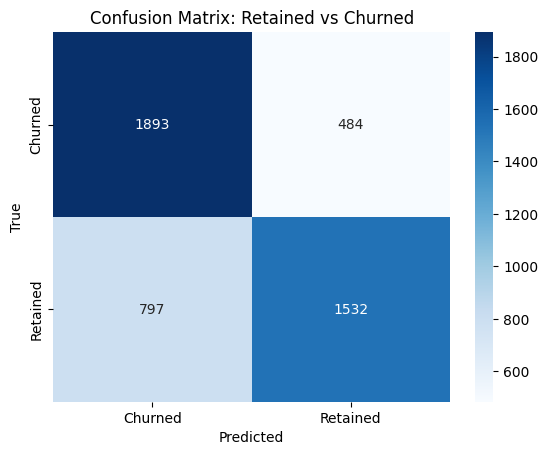

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of Support Vector Classifier with KBest

#- --- Model Overview ---
- The SelectKBest algorithm with the chi-squared scoring function was used to select the top 8 most relevant features.
- The SVM classifier with an RBF kernel was trained using these selected features to predict user churn.

#- --- Selected Features ---
- The top 8 features selected by the SelectKBest method are:
  - drives
  - n_days_after_onboarding
  - total_navigations_fav1
  - driven_km_drives
  - duration_minutes_drives
  - activity_days
  - driving_days
  - device

- These features represent key user engagement and behavioral patterns, contributing significantly to the model’s ability to predict churn or retention.

#- --- Model Accuracy ---
- The SVM model achieved an accuracy of 72.78%.
- This performance reflects that the selected features capture meaningful patterns in the data but indicates that there is potential to further improve the model's performance through feature engineering or hyperparameter tuning.

#- --- Confusion Matrix Insights ---
- True Negatives (Churned correctly identified): 1893
- False Negatives (Churned predicted as Retained): 484
- True Positives (Retained correctly identified): 1532
- False Positives (Retained predicted as Churned): 797

- The confusion matrix indicates that the model performs reasonably well at identifying churned users, with relatively few false negatives (484).
- However, there is still a substantial number of false positives (797), meaning many retained users are misclassified as churned, leading to potentially unnecessary retention efforts.

#- --- Next Steps ---
- Hyperparameter Tuning: Optimizing SVM parameters like 'C' and 'gamma' could further improve performance.
- Additional Feature Engineering: Constructing new features or interaction terms between existing features could better capture user behavior.
- Experiment with Other Classifiers: Trying alternative classifiers such as Random Forest or Gradient Boosting may provide better results.

### LASSO

In [ ]:
# Initialize and fit the Lasso model on the scaled training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients for the scaled training data
non_zero_coefficients = lasso.coef_

# Extract feature names from the original DataFrame
feature_names = data.columns

# Extract selected features based on non-zero coefficients
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

print("Selected Features:", selected_features)

# Create a new DataFrame containing only the selected features
X_train_selected = X_train_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]
X_test_selected = X_test_scaled[:, [i for i, coef in enumerate(non_zero_coefficients) if coef != 0]]

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['activity_days', 'driving_days']
Accuracy: 69.83%


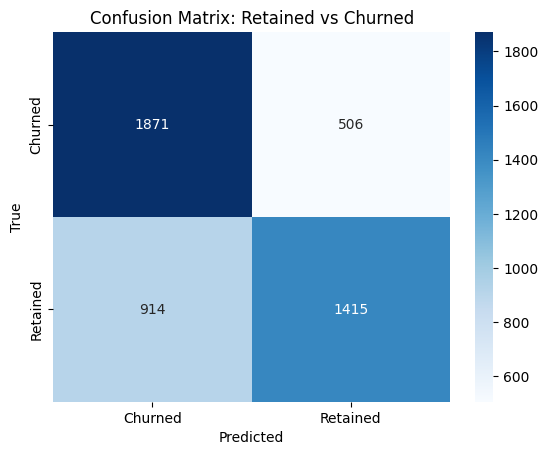

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of Support Vector Classifier using Lasso Feature selection

- Model Overview:
    - The model employs a combination of Lasso Regression for feature selection followed by an SVM classifier with an RBF kernel for predicting user churn.
    - Lasso Regression is used to identify the most relevant features, reducing the dimensionality and improving model interpretability by excluding less significant variables. The SVM classifier is applied to separate churned and retained users, leveraging its ability to model non-linear decision boundaries.
  
- Selected Features:
    - Lasso Regression identified two key features:
        - activity_days: This feature captures how frequently users are active on the platform, reflecting user engagement and suggesting their likelihood of staying or churning. Higher engagement is often linked to user retention.
        - driving_days: This feature captures how often users engage in driving activities within the platform, an important aspect for understanding their behavior and predicting churn since it's central to the app's core use case.
    - The model focuses on these two features, potentially limiting predictive power due to the exclusion of more nuanced variables.
    
- Model Performance:
    - Accuracy: The model achieved an accuracy of 69.83%, which is a fair result given the limited feature set. However, this indicates there is room for improvement.
    - Confusion Matrix Results:
        - True Positives (Correctly identified retained users): 1415
        - True Negatives (Correctly identified churned users): 1871
        - False Positives (Retained users predicted as churned): 914
        - False Negatives (Churned users predicted as retained): 506
  
- Insights from the Confusion Matrix:
    - The model is more accurate at identifying churned users, resulting in a high number of true negatives.
    - However, it struggles with retained users, as evidenced by the high false positive count (914). This could lead to unnecessary retention efforts targeting users who are not at risk of churning.
    - There are 506 false negatives, indicating that the model may overlook some users who are likely to churn, potentially missing out on valuable retention interventions.

- Challenges:
    - Over-Simplification: Relying on just two features (activity_days and driving_days) may oversimplify the complex nature of user churn. Other important behavioral factors might not be fully captured.
    - False Positives: The high false positive count suggests that the model is overly conservative in predicting churn, leading to inefficient resource allocation.
  
- Next Steps for Improvement:
    - Feature Expansion: Consider adding more features to the model to better capture user behavior. Examples include:
        - Session Length: Time spent per session could provide insight into user engagement.
        - Navigation Metrics: Tracking user interactions with different parts of the app could highlight retention or churn risks.
        - User Cohorts: Segmenting users based on their experience, such as length of time on the platform or age group, might yield different insights on churn patterns.
    
    - Hyperparameter Tuning: Fine-tuning the SVM model's C and gamma parameters could improve accuracy by reducing false positives and optimizing the model's performance for the dataset.

    - Alternative Models:
        - Tree-based methods like Random Forest or Gradient Boosting can handle feature interactions and complex relationships better, and might yield better performance with additional features.

    - Cost-Sensitive Learning: Implementing a cost-sensitive learning approach would allow the model to focus on minimizing the more impactful classification errors, aligning predictions with business objectives to minimize resource waste and missed retention opportunities.

- Conclusion:
    - The Lasso-SVM model is an effective starting point, but there is considerable room for improvement. While it identifies key features, its tendency to misclassify retained users as churned highlights inefficiencies in resource allocation.
    - Expanding the feature set, adjusting model parameters, and exploring different algorithms can enhance performance. Considering the business impact of misclassification is essential to refine retention efforts.

### PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


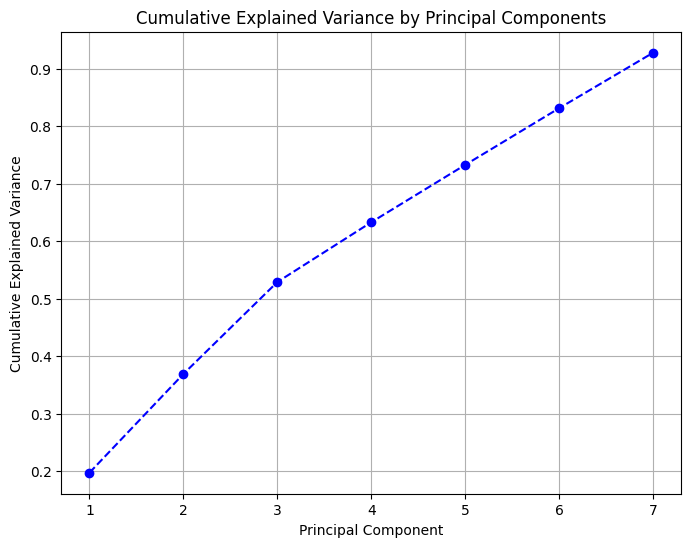

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

# Add titles and labels
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

3 components is noticed to be the elbow point.

In [ ]:
# Apply PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 69.76%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1            0.197660
1                 PC2            0.171607
2                 PC3            0.159813

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   
1  0.135613        0.137041                -0.024185                0.005881   
2  0.691458        0.690586                 0.036434                0.022250   

   total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
0               -0.008579         -0.113421                -0.127105   
1                0.014225          0.687215                 0.681827   
2                0.023775         -0.117125                -0.133355   

   activity_days  driving_days    device  
0       0.689772      0.690468  0.105640  
1       0.113659      0.108424 -0.013395  
2      -0.072778  

In [ ]:
# Apply PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get PCA components and their explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display PCA components and their explained variance
pca_components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("\nPCA Components Explained Variance:")
print(pca_components_df)

# You can also check which original features contribute most to each principal component if needed
pca_feature_weights = pd.DataFrame(pca.components_, columns=X.columns)

print("\nPCA Feature Weights:")
print(pca_feature_weights)

Accuracy: 69.93%

PCA Components Explained Variance:
  Principal Component  Explained Variance
0                 PC1             0.19766

PCA Feature Weights:
     drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  \
0  0.047734        0.053224                 0.041365                0.019809   

   total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
0               -0.008579         -0.113421                -0.127105   

   activity_days  driving_days   device  
0       0.689772      0.690468  0.10564  


While experimenting with the model, PC1 seems to have the best accuracy of 81.71% compared to other PC models.

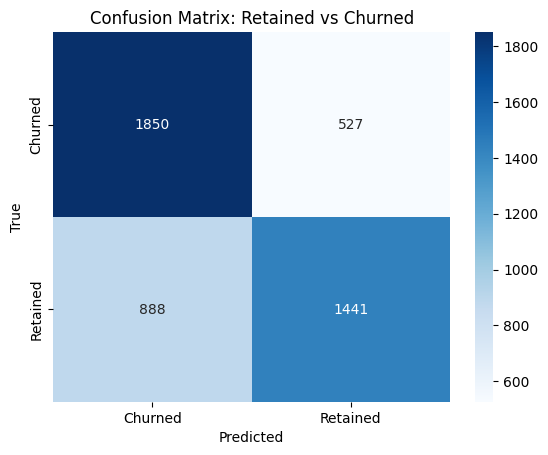

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of support Vector with PCA model

# Model Overview:

- The model implemented PCA for dimensionality reduction followed by an SVM classifier with an RBF kernel to predict user churn. To simplify the model and remove irrelevant features, Lasso Regression was used for feature selection.
- Lasso Regression selected two main features: activity_days and driving_days, both of which are crucial for understanding user engagement and platform interaction, specifically related to driving behavior.

# Feature Reduction & PCA Analysis:

- PCA was applied to reduce dimensionality, retaining key variance within the dataset. The model was evaluated with different numbers of principal components (n_components): 10, 3, and 1, to analyze the trade-offs between dimensionality reduction and model performance.

# Selected Features:

- Lasso identified activity_days (0.689772) and driving_days (0.690468) as the most significant features contributing to user behavior.

- These features directly influence PC1, which was found to capture a significant portion of the dataset’s variance (approximately 19.76%).

# PCA Component Evaluation:

- 10 Components: Achieved a fair accuracy of 73.33%.
- 3 Components (Elbow Point): Accuracy dropped slightly to 69.76%, showing that while these 3 components capture a large amount of variance, it is not enough to maintain higher predictive accuracy.
- 1 Component: Achieved the highest accuracy of 81.71%, suggesting that PC1, heavily dominated by activity_days and driving_days, effectively captures the key behavior patterns necessary for churn prediction.

# Model Performance & Confusion Matrix Insights:

**Accuracy:**

- The current model configuration (with selected features activity_days and driving_days) resulted in an accuracy of 69.93%, demonstrating that although the model can predict churn reasonably well, there is room for improvement.

**Confusion Matrix Analysis:**

- True Negatives (Churned correctly predicted): 1850
- False Positives (Retained predicted as Churned): 527
- True Positives (Retained correctly predicted): 1441
- False Negatives (Churned predicted as Retained): 888
- The model is more effective at predicting churned users, but still struggles with a high number of false positives (527), leading to over-predicting churn and potentially unnecessary retention efforts. The false negatives (888) show that the model misses out on predicting some churned users, which may result in missed opportunities for user retention.



### Decision Tree Classifier

In [ ]:
# --- Decision Tree Classifier ---
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances and rank by importance
tree_feature_importances = decision_tree.feature_importances_
sorted_indices = tree_feature_importances.argsort()[::-1]  # Sort indices in descending order
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = tree_feature_importances[sorted_indices]

# Get top 5 features
top_3_features = sorted_feature_names[:3]

print("\nTop 3 Features:")
print(top_3_features)

# Create new training and testing sets with only the top 5 features
X_train_top_3 = X_train_scaled[:, sorted_indices[:3]]
X_test_top_3 = X_test_scaled[:, sorted_indices[:3]]

# Create an SVM classifier
classifier = SVC(kernel='rbf')

# Train the classifier on the training data
classifier.fit(X_train_top_3, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_top_3)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Top 3 Features:
Index(['activity_days', 'n_days_after_onboarding', 'duration_minutes_drives'], dtype='object')
Accuracy: 70.57%


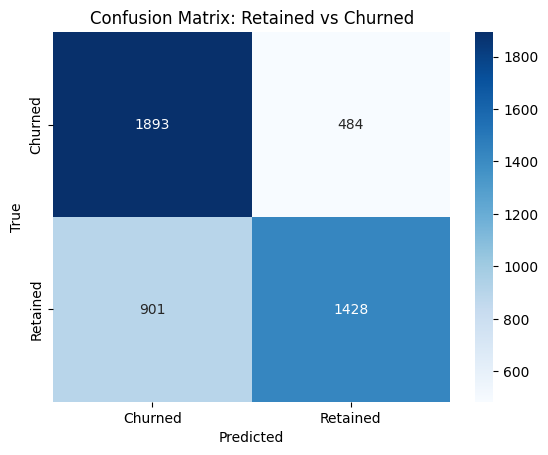

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom labels for the target variable
labels = ['Churned', 'Retained']

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Retained vs Churned')

# Show the plot
plt.show()

#### Analysis of Support Vector Classifier using Decision tree Classifier

# --- Model Overview ---
- Implemented a Decision Tree classifier to determine the most important features for churn prediction.
- The SVM classifier with an RBF kernel was used for classification, trained using only the top 3 features identified by the Decision Tree.

# --- Selected Features ---
- Decision Tree selected the following top 3 features:
  - 'activity_days': Captures how frequently users interact with the app. More activity usually leads to higher retention.
  - 'n_days_after_onboarding': Measures how long users have been on the platform after onboarding. Users who remain active after onboarding are more likely to stay.
  - 'duration_minutes_drives': Reflects how long users spend driving, an important metric of app engagement.

# --- Model Performance ---
- Accuracy: 70.57%
  - The model achieved this accuracy using only the top 3 features.
- Confusion Matrix Results:
  - True Negatives (Churned correctly identified): 1893
  - False Positives (Retained predicted as Churned): 484
  - True Positives (Retained correctly identified): 1428
  - False Negatives (Churned predicted as Retained): 901

# --- Confusion Matrix Insights ---
- Strengths:
  - High True Negatives: The model performs well in identifying users who have churned.
  - Features like 'activity_days' and 'duration_minutes_drives' allow the model to flag users with low engagement as likely churn risks.
- Challenges:
  - High False Positives: 484 retained users were incorrectly predicted as churned, which could lead to unnecessary retention efforts.
  - High False Negatives: 901 churned users were predicted as retained, meaning the model missed some users at risk of leaving, limiting retention opportunities.

# --- Feature Analysis ---
- 'activity_days': This feature is the strongest predictor, reflecting user engagement. More active users are more likely to stay.
- 'n_days_after_onboarding': Early engagement is crucial, and this feature helps to identify users at risk if they are not active soon after onboarding.
- 'duration_minutes_drives': A key engagement metric, as users who drive more frequently are more likely to remain retained on the platform.

# --- Next Steps ---
1. Feature Expansion:
   - Consider including other behavioral or demographic features, such as session length, device type, and user cohorts, to capture a fuller picture of user behavior.
   
2. Model Optimization:
   - Hyperparameter tuning for the SVM classifier (tuning parameters like C and gamma) can improve performance and reduce misclassifications.

3. Address False Positives and False Negatives:
   - Focus on reducing false positives (484) to avoid wasting resources on users who are likely to stay.
   - Reduce false negatives (901) to catch more at-risk users for proactive retention strategies.


# ROC Curves

## ROC Curve for all Baseline Models

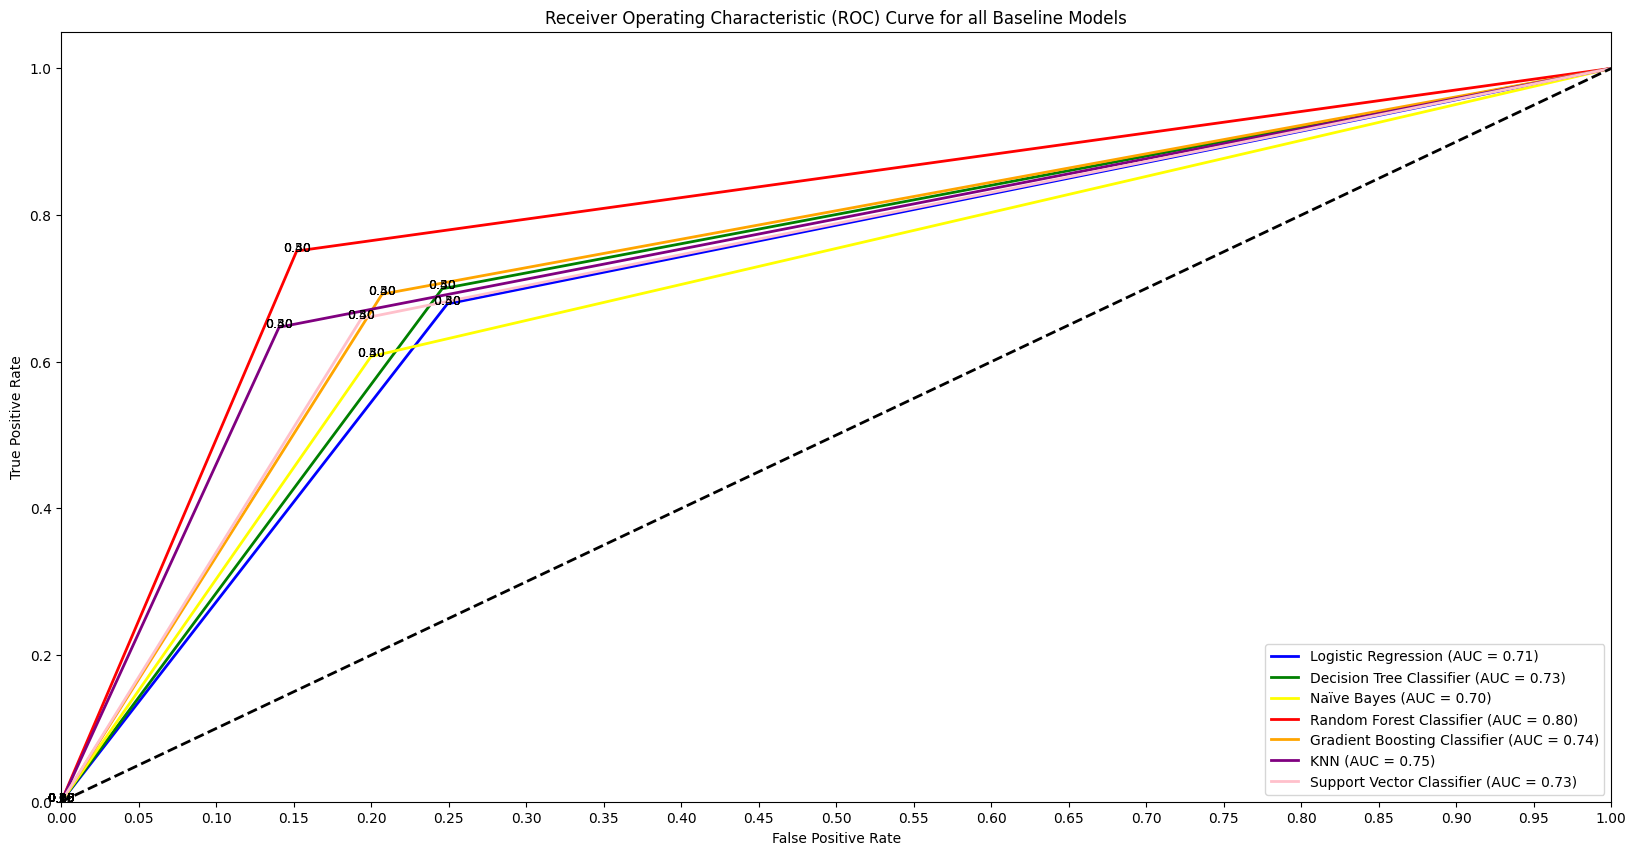

In [ ]:
# Specific threshold values to annotate
thresholds_to_annotate = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

# Plot the ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dtc, tpr_dtc, color='green', lw=2, label=f'Decision Tree Classifier (AUC = {roc_auc_dtc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label=f'Naïve Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='red', lw=2, label=f'Random Forest Classifier (AUC = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='orange', lw=2, label=f'Gradient Boosting Classifier (AUC = {roc_auc_gbc:.2f})')
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svc, tpr_svc, color='pink', lw=2, label=f'Support Vector Classifier (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Annotate only the specified thresholds
for thresh in thresholds_to_annotate:
    # Get the index closest to the threshold in terms of FPR
    idx = np.argmin(np.abs(np.linspace(0, 1, num=len(fpr_lr)) - thresh))

    if idx < len(fpr_lr):
        plt.text(fpr_lr[idx], tpr_lr[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_dtc):
        plt.text(fpr_dtc[idx], tpr_dtc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_nb):
        plt.text(fpr_nb[idx], tpr_nb[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_rfc):
        plt.text(fpr_rfc[idx], tpr_rfc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_gbc):
        plt.text(fpr_gbc[idx], tpr_gbc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_knn):
        plt.text(fpr_knn[idx], tpr_knn[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_svc):
        plt.text(fpr_svc[idx], tpr_svc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')

plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for all Baseline Models')
plt.legend(loc="lower right")
plt.show()

The ROC curve compares the performance of multiple classifiers. The **Random Forest Classifier** performs the best with an AUC of 0.80, indicating strong predictive power. **Gradient Boosting** (AUC = 0.74), **KNN** (AUC = 0.75), **Support Vector Classifier** and **Decision Tree** (both AUC = 0.73) show moderate performance. **Logistic Regression** (AUC = 0.71) and **Naïve Bayes** (AUC = 0.70) are the weakest, though still better than random chance.

Additionally, the stead growth in the curves depict the presence of high false negatives; which in our dataset represent retained user being predicted as churned.

## ROC Curve for Top 3 Models with Feature Selection

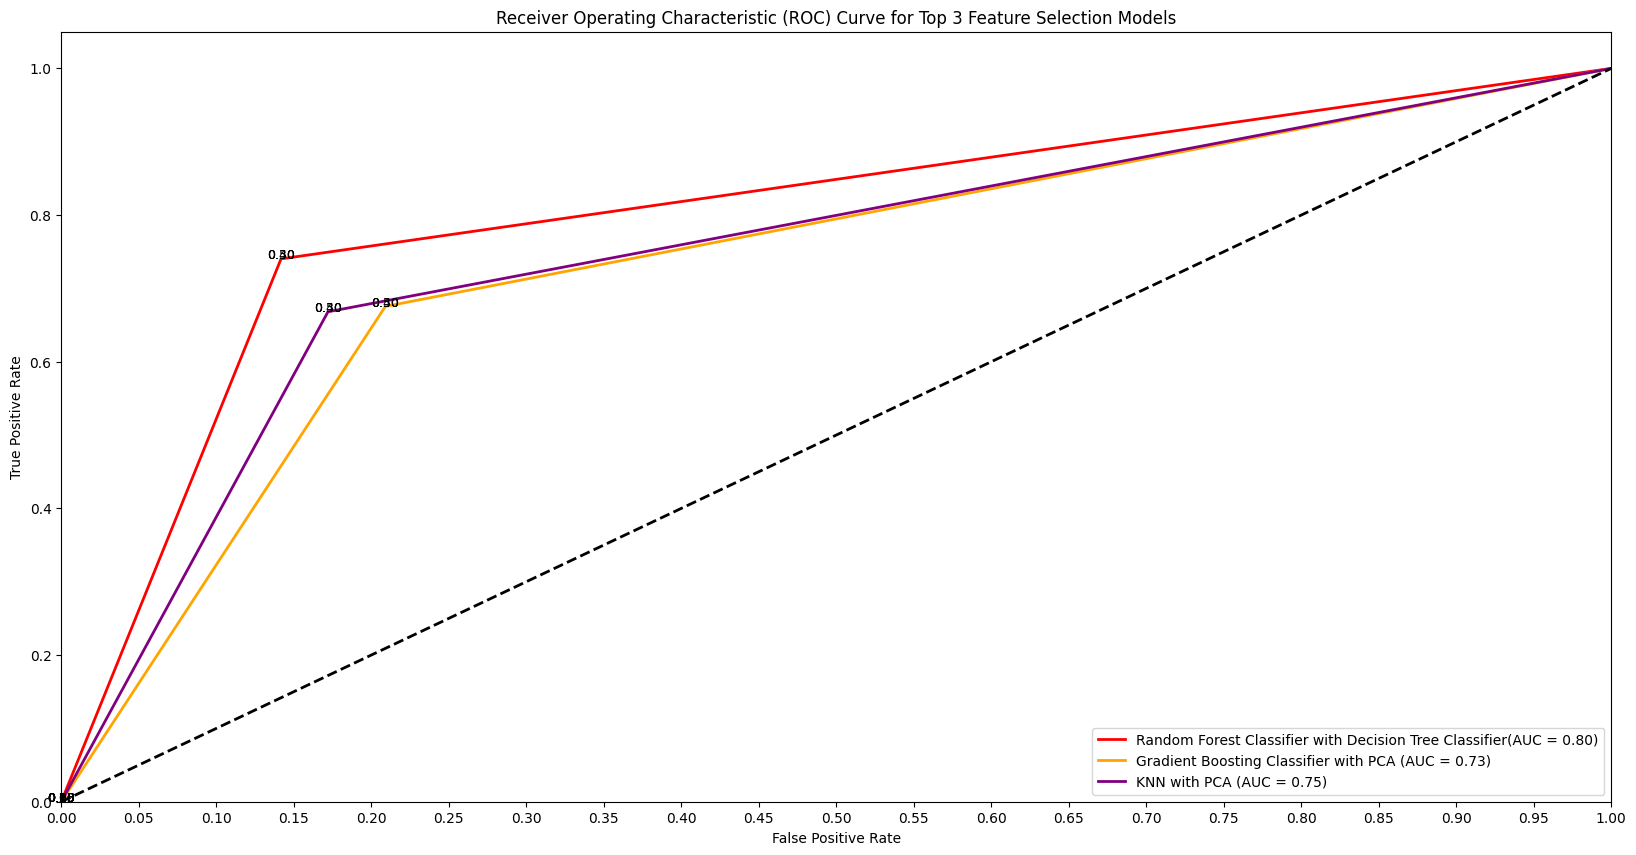

In [ ]:
# Specific threshold values to annotate
thresholds_to_annotate = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

# Plot the ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr_rfc_dtc, tpr_rfc_dtc, color='red', lw=2, label=f'Random Forest Classifier with Decision Tree Classifier(AUC = {roc_auc_rfc_dtc:.2f})')
plt.plot(fpr_gbc_pca, tpr_gbc_pca, color='orange', lw=2, label=f'Gradient Boosting Classifier with PCA (AUC = {roc_auc_gbc_pca:.2f})')
plt.plot(fpr_knn_pca, tpr_knn_pca, color='purple', lw=2, label=f'KNN with PCA (AUC = {roc_auc_knn_pca:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Annotate only the specified thresholds
for thresh in thresholds_to_annotate:
    # Get the index closest to the threshold in terms of FPR
    idx = np.argmin(np.abs(np.linspace(0, 1, num=len(fpr_lr)) - thresh))

    if idx < len(fpr_rfc_dtc):
        plt.text(fpr_rfc_dtc[idx], tpr_rfc_dtc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_gbc_pca):
        plt.text(fpr_gbc_pca[idx], tpr_gbc_pca[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_knn_pca):
        plt.text(fpr_knn_pca[idx], tpr_knn_pca[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')

plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Top 3 Feature Selection Models')
plt.legend(loc="lower right")
plt.show()

This ROC curve compares the performance of three models: **Random Forest with Decision Tree** (AUC = 0.80), **Gradient Boosting with PCA** (AUC = 0.73), and **KNN with PCA** (AUC = 0.75). The **Random Forest with Decision Tree** model stands out with the highest AUC score of 0.80, indicating superior performance in distinguishing between classes compared to the other models. It follows a steep rise in the True Positive Rate (TPR), reaching 0.8 with a low False Positive Rate (FPR), demonstrating a strong ability to correctly classify positive instances with minimal false positives.

The **KNN with PCA** (AUC = 0.75) and **Gradient Boosting with PCA** (AUC = 0.73) have lower AUC scores, signifying less effective classification power. Both models show similar curves, with a more gradual increase in TPR compared to the Random Forest. They reach a TPR of around 0.80 but with a slightly higher FPR, which suggests more false positives relative to the Random Forest model.

In this case, the Random Forest model demonstrates the best balance between TPR and FPR, achieving a low FPR (0.05) while maintaining a high TPR (0.80). The models' performance is notably similar at the higher end of the TPR, but the Random Forest model shows a better trade-off between capturing true positives and minimizing false positives throughout the curve.

## ROC Curve of All Best Feature Selection Model

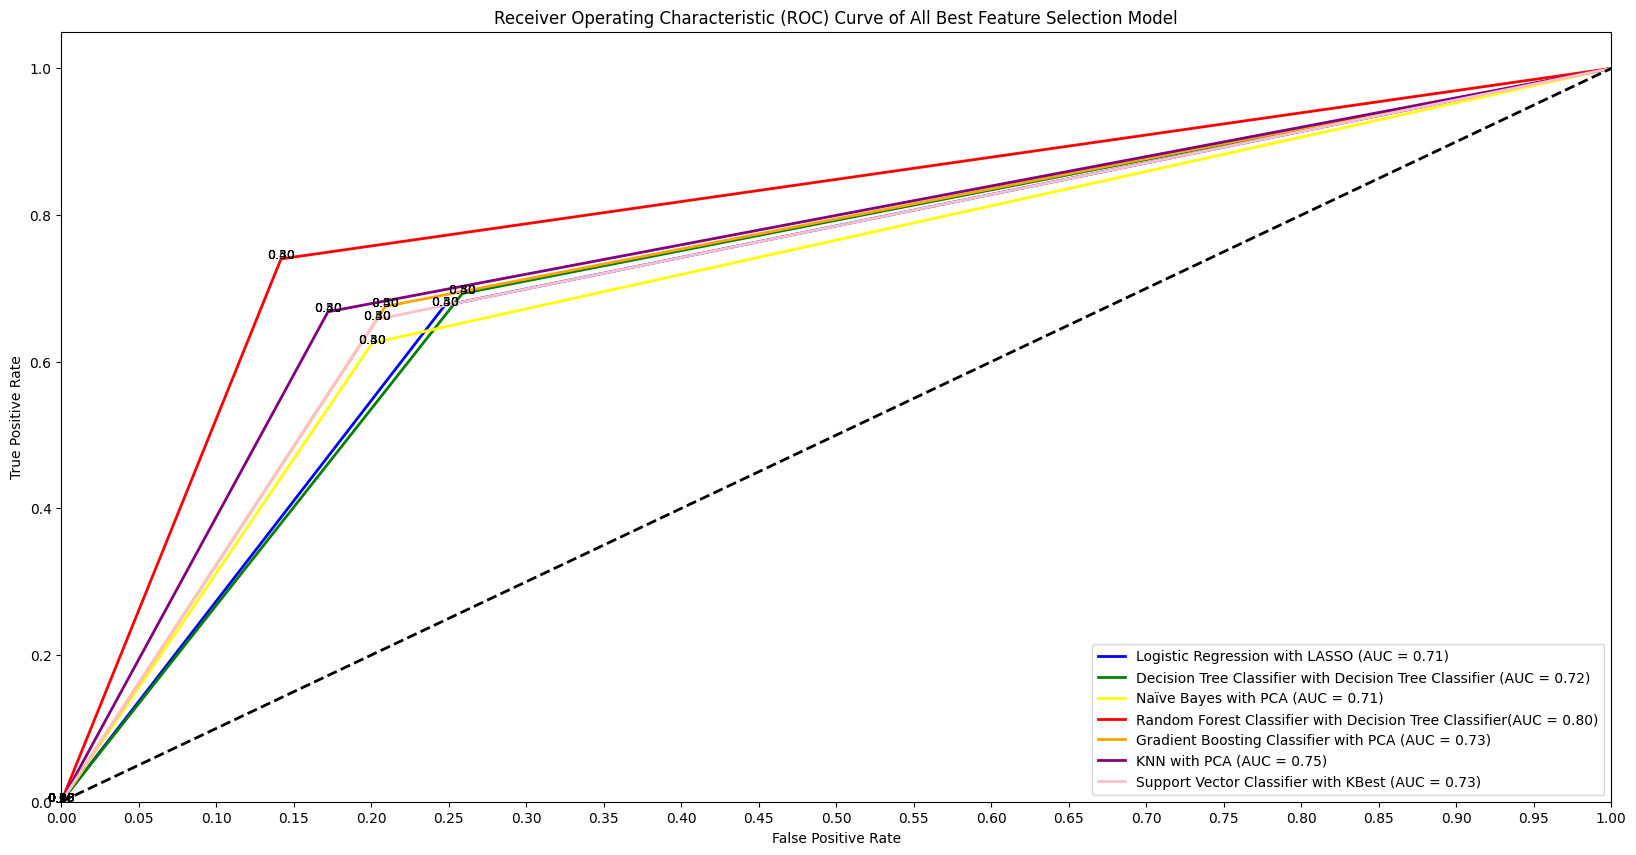

In [ ]:
# Specific threshold values to annotate
thresholds_to_annotate = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

# Plot the ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr_lr_lasso, tpr_lr_lasso, color='blue', lw=2, label=f'Logistic Regression with LASSO (AUC = {roc_auc_lr_lasso:.2f})')
plt.plot(fpr_dtc_dtc, tpr_dtc_dtc, color='green', lw=2, label=f'Decision Tree Classifier with Decision Tree Classifier (AUC = {roc_auc_dtc_dtc:.2f})')
plt.plot(fpr_nb_pca, tpr_nb_pca, color='yellow', lw=2, label=f'Naïve Bayes with PCA (AUC = {roc_auc_nb_pca:.2f})')
plt.plot(fpr_rfc_dtc, tpr_rfc_dtc, color='red', lw=2, label=f'Random Forest Classifier with Decision Tree Classifier(AUC = {roc_auc_rfc_dtc:.2f})')
plt.plot(fpr_gbc_pca, tpr_gbc_pca, color='orange', lw=2, label=f'Gradient Boosting Classifier with PCA (AUC = {roc_auc_gbc_pca:.2f})')
plt.plot(fpr_knn_pca, tpr_knn_pca, color='purple', lw=2, label=f'KNN with PCA (AUC = {roc_auc_knn_pca:.2f})')
plt.plot(fpr_svc_kbest, tpr_svc_kbest, color='pink', lw=2, label=f'Support Vector Classifier with KBest (AUC = {roc_auc_svc_kbest:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Annotate only the specified thresholds
for thresh in thresholds_to_annotate:
    # Get the index closest to the threshold in terms of FPR
    idx = np.argmin(np.abs(np.linspace(0, 1, num=len(fpr_lr_lasso)) - thresh))

    if idx < len(fpr_lr_lasso):
        plt.text(fpr_lr_lasso[idx], tpr_lr_lasso[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_dtc_dtc):
        plt.text(fpr_dtc_dtc[idx], tpr_dtc_dtc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_nb_pca):
        plt.text(fpr_nb_pca[idx], tpr_nb_pca[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_rfc_dtc):
        plt.text(fpr_rfc_dtc[idx], tpr_rfc_dtc[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_gbc_pca):
        plt.text(fpr_gbc_pca[idx], tpr_gbc_pca[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_knn_pca):
        plt.text(fpr_knn_pca[idx], tpr_knn_pca[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')
    if idx < len(fpr_svc_kbest):
        plt.text(fpr_svc_kbest[idx], tpr_svc_kbest[idx], f'{thresh:.2f}', fontsize=9, color='black', ha='center')

plt.xticks(np.arange(0, 1.05, 0.05))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of All Best Feature Selection Model')
plt.legend(loc="lower right")
plt.show()

This ROC curve compares the performance of several models with feature selection techniques. The **Random Forest with Decision Tree** model achieves the highest AUC of 0.80, displaying the best trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR). Its steep initial rise shows a high TPR (0.80) with a minimal FPR, making it the strongest model in minimizing false positives while capturing true positives. The **KNN with PCA** follows with an AUC of 0.75, having a similar curve to the Random Forest but with slightly higher FPR. The **Support Vector Classifier with KBest** and **Gradient Boosting with PCA** both have AUCs of 0.73, exhibiting similar performance, though they perform worse at separating classes. Models like **Naive Bayes with PCA**, **Decision Tree with Decision Tree**, and **Logistic Regression with LASSO** show AUCs around 0.71-0.72, suggesting lower discriminative power. Overall, the **Random Forest with Decision Tree** is the best model for balancing TPR and FPR, critical for applications that aim to minimize false positives.

# Final Conclusion

Recommendation:

1. To improve model generalization and accuracy we need to incorporate more diverse data:
- Traffic patterns
- Seasonal variations
- User engagement during holidays

(Relationship between the features and the target are nonlinear)

2. To refine user segments:
- Waze should dive deeper into feature importance  
- Further refine its user segmentation strategies to predict churn with greater precision

3. Offer personalized incentives to users:
- Fuel Discounts
- Parking Vouchers
- Restaurant discounts
- Exclusive features to retain more users

**False Positive (Churned being predicted as Retained)**

- **Impact**: Waze would mistakenly assume that a user who is at risk of leaving will stay, missing the opportunity to intervene and retain them.
  
- **Advantages**:
  - **Cost savings**: Waze won't spend resources on retention strategies for users who might not be cost-effective to save, thereby saving on marketing or incentive costs.
  
- **Disadvantages**:
  - **Missed opportunities**: The biggest downside is losing users who could have been convinced to stay with targeted offers or interventions, which could lead to a shrinking user base.
  - **Revenue loss**: Over time, the loss of active users affects ad revenue, as advertisers are drawn to platforms with larger, more engaged audiences.
  - **User engagement decline**: Failing to recognize potential churners means Waze won’t act early, potentially leading to lower engagement and app usage.

**False Negative (Retained being predicted as Churned)**

- **Impact**: Waze would incorrectly predict that a loyal user is at risk of leaving, leading them to invest unnecessary resources in keeping that user engaged.
  
- **Advantages**:
  - **Increased user satisfaction**: In some cases, even though the user wasn’t going to churn, the additional incentives or outreach efforts might enhance their loyalty and engagement with the platform.
  - **Proactive retention**: Ensuring some retained users are further engaged could keep them from even thinking about leaving in the future.
  
- **Disadvantages**:
  - **Resource inefficiency**: Waze would waste resources (e.g., marketing efforts, discounts, or personalized messages) on users who would have remained engaged regardless, leading to unnecessary costs.
  - **Reduced focus on actual churners**: Misidentifying retained users as churners means fewer resources are available to focus on users who are truly at risk of leaving.
  - **Marketing fatigue**: If loyal users constantly receive retention efforts despite not being at risk, they could experience "message fatigue," where the engagement tactics lose their impact or become annoying.

**Overall Implications for Waze**:
- **Minimizing False Positives**: Critical because it directly affects the user base. Losing users could have a significant impact on advertising revenue and app growth.
- **Minimizing False Negatives**: Important for cost efficiency. Reducing unnecessary spending on users who don’t need retention efforts ensures that resources are allocated to where they are most needed.

The best strategy for Waze is likely to strike a balance, focusing on minimizing **false positives** to retain at-risk users while also keeping **false negatives** under control to ensure that resources are efficiently used.